# Introduction 
This data files is about the US National estimates of rates for job openings, hires, and total separations. And Total separations are broken out into quits, layoffs and discharges, and other separations.
All data are presented on a monthly basis. The data range is from 2020-2023. And as required, we mainly focus on the information industry. 

# Goals of the analysis

- To find meaningful insights from job openings, hires, and total separations.

- Are there trends in the last decade from the tech (information) industry ?

- What are the connections/relationships between Stack Overflow data files and this datasets ? 

# Exploratory Data Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#use this line to see plots in the notebook:
%matplotlib inline

In [4]:
df = pd.read_csv('jt_modified.csv')

In [5]:
df

,date,JobOpenings_Level,JobOpenings_Rate,Hires_Level,Hires_Rate,TotalSeparations_Level,TotalSeparations_Rate,Quits_Level,Quits_Rate,LayoffsDischarges_Level,LayoffsDischarges_Rate,OtherSeparations_Level,OtherSeparations_Rate
0,2000-12-01,161,4.2,111,3.0,98,2.7,60,1.6,31,0.8,7,0.2
1,2001-01-01,166,4.3,171,4.6,159,4.3,102,2.7,44,1.2,13,0.3
2,2001-02-01,147,3.8,135,3.6,121,3.3,66,1.8,43,1.2,12,0.3
3,2001-03-01,130,3.4,110,3.0,103,2.8,67,1.8,23,0.6,14,0.4
4,2001-04-01,171,4.4,124,3.4,163,4.4,98,2.7,55,1.5,11,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2022-10-01,230,6.9,99,3.2,94,3.0,32,1.0,47,1.5,14,0.5
263,2022-11-01,213,6.4,112,3.6,98,3.1,41,1.3,46,1.5,12,0.4
264,2022-12-01,106,3.3,97,3.1,99,3.2,46,1.5,46,1.5,7,0.2
265,2023-01-01,138,4.3,85,2.7,104,3.4,41,1.3,48,1.5,15,0.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     267 non-null    object 
 1   JobOpenings_Level        267 non-null    int64  
 2   JobOpenings_Rate         267 non-null    float64
 3   Hires_Level              267 non-null    int64  
 4   Hires_Rate               267 non-null    float64
 5   TotalSeparations_Level   267 non-null    int64  
 6   TotalSeparations_Rate    267 non-null    float64
 7   Quits_Level              267 non-null    int64  
 8   Quits_Rate               267 non-null    float64
 9   LayoffsDischarges_Level  267 non-null    int64  
 10  LayoffsDischarges_Rate   267 non-null    float64
 11  OtherSeparations_Level   267 non-null    int64  
 12  OtherSeparations_Rate    267 non-null    float64
dtypes: float64(6), int64(6), object(1)
memory usage: 27.2+ KB


In [7]:
df.shape

(267, 13)

In [8]:
#Convert the column type from string to datetime format in Pandas dataframe
df['date']= pd.to_datetime(df['date'])

In [9]:
#extract Year,month from Datetime
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df

,date,JobOpenings_Level,JobOpenings_Rate,Hires_Level,Hires_Rate,TotalSeparations_Level,TotalSeparations_Rate,Quits_Level,Quits_Rate,LayoffsDischarges_Level,LayoffsDischarges_Rate,OtherSeparations_Level,OtherSeparations_Rate,year,month
0,2000-12-01,161,4.2,111,3.0,98,2.7,60,1.6,31,0.8,7,0.2,2000,12
1,2001-01-01,166,4.3,171,4.6,159,4.3,102,2.7,44,1.2,13,0.3,2001,1
2,2001-02-01,147,3.8,135,3.6,121,3.3,66,1.8,43,1.2,12,0.3,2001,2
3,2001-03-01,130,3.4,110,3.0,103,2.8,67,1.8,23,0.6,14,0.4,2001,3
4,2001-04-01,171,4.4,124,3.4,163,4.4,98,2.7,55,1.5,11,0.3,2001,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2022-10-01,230,6.9,99,3.2,94,3.0,32,1.0,47,1.5,14,0.5,2022,10
263,2022-11-01,213,6.4,112,3.6,98,3.1,41,1.3,46,1.5,12,0.4,2022,11
264,2022-12-01,106,3.3,97,3.1,99,3.2,46,1.5,46,1.5,7,0.2,2022,12
265,2023-01-01,138,4.3,85,2.7,104,3.4,41,1.3,48,1.5,15,0.5,2023,1


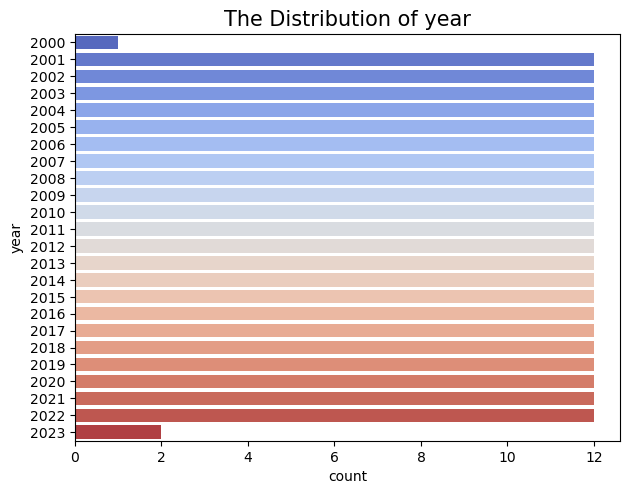

In [10]:
chart=sns.countplot(y='year', data=df, palette = 'coolwarm')
#chart.set_xticklabels(chart.get_xticklabels(),fontsize=9)
#chart.set_yticklabels(chart.get_yticklabels(),fontsize=9)
plt.tight_layout()
plt.title("The Distribution of year", size=15)
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     267 non-null    datetime64[ns]
 1   JobOpenings_Level        267 non-null    int64         
 2   JobOpenings_Rate         267 non-null    float64       
 3   Hires_Level              267 non-null    int64         
 4   Hires_Rate               267 non-null    float64       
 5   TotalSeparations_Level   267 non-null    int64         
 6   TotalSeparations_Rate    267 non-null    float64       
 7   Quits_Level              267 non-null    int64         
 8   Quits_Rate               267 non-null    float64       
 9   LayoffsDischarges_Level  267 non-null    int64         
 10  LayoffsDischarges_Rate   267 non-null    float64       
 11  OtherSeparations_Level   267 non-null    int64         
 12  OtherSeparations_Rate    267 non-nul

## Data from 2001-2022 (label as df2)

In [12]:
df2 = df[(df['year'] <= 2022) & (df['year'] > 2000)]

<Figure size 2400x1200 with 0 Axes>

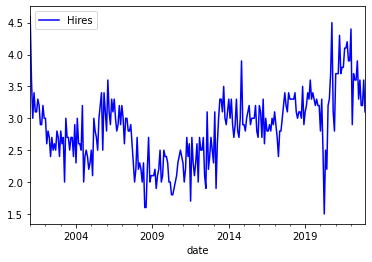

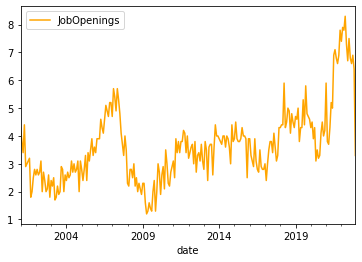

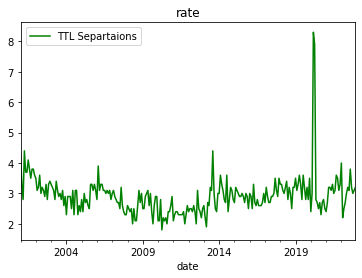

In [11]:
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)

df2.plot(x="date", y="Hires_Rate", kind="line",label='Hires', color='blue')
df2.plot(x="date", y="JobOpenings_Rate",kind="line",label='JobOpenings', color='orange')
df2.plot(x="date", y="TotalSeparations_Rate",kind="line",label='TTL Separtaions', color='green' )
# adding title to the plot
plt.title('rate')
  
# adding Label to the x-axis
plt.xlabel('date')
  
# adding legend to the curve
plt.legend()

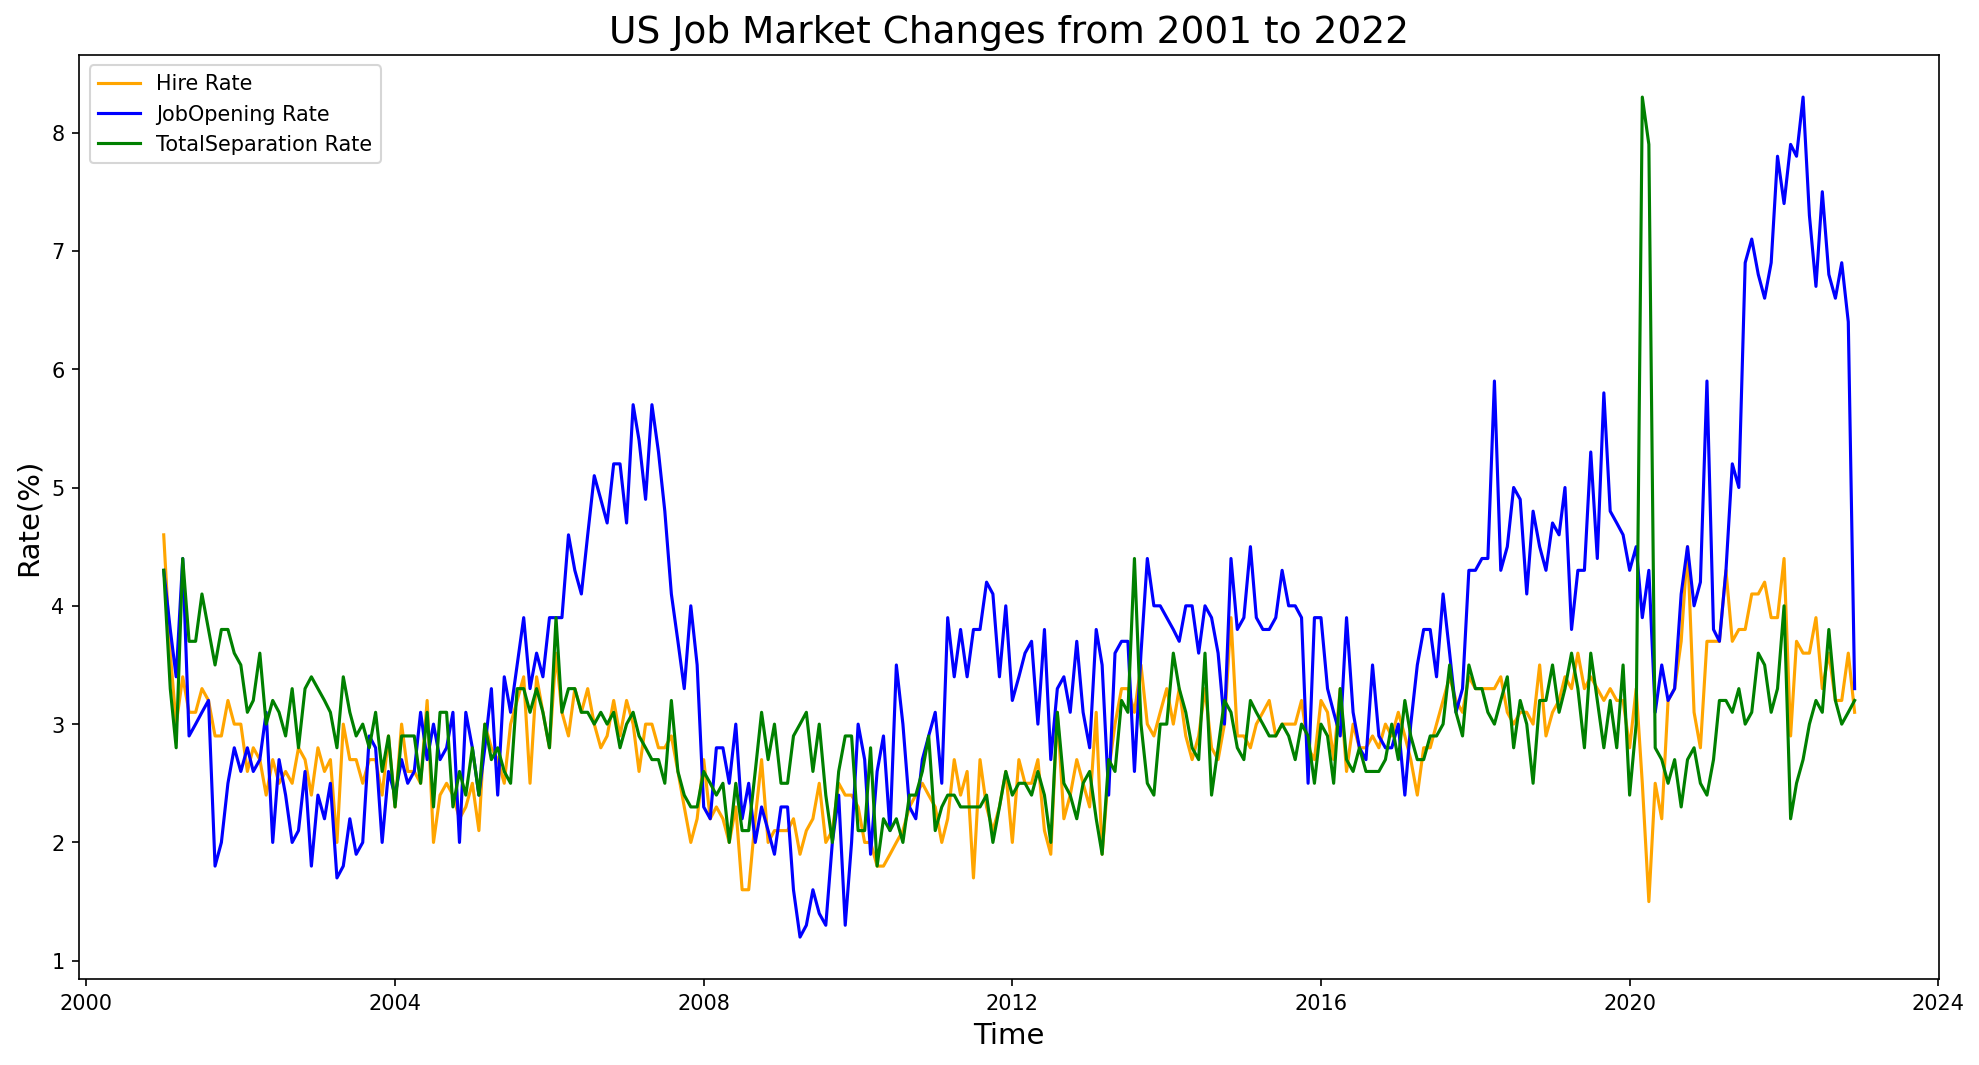

In [13]:
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
#plot individual lines with custom colors and labels
plt.plot(df2['date'],df2['Hires_Rate'], label='Hire Rate', color='orange')
plt.plot(df2['date'],df2['JobOpenings_Rate'], label='JobOpening Rate', color='blue')
plt.plot(df2['date'],df2['TotalSeparations_Rate'], label='TotalSeparation Rate', color='green')

#add legend
plt.legend()

#add axes labels and a title
plt.ylabel('Rate(%)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('US Job Market Changes from 2001 to 2022', fontsize=18)

#display plot
plt.show()

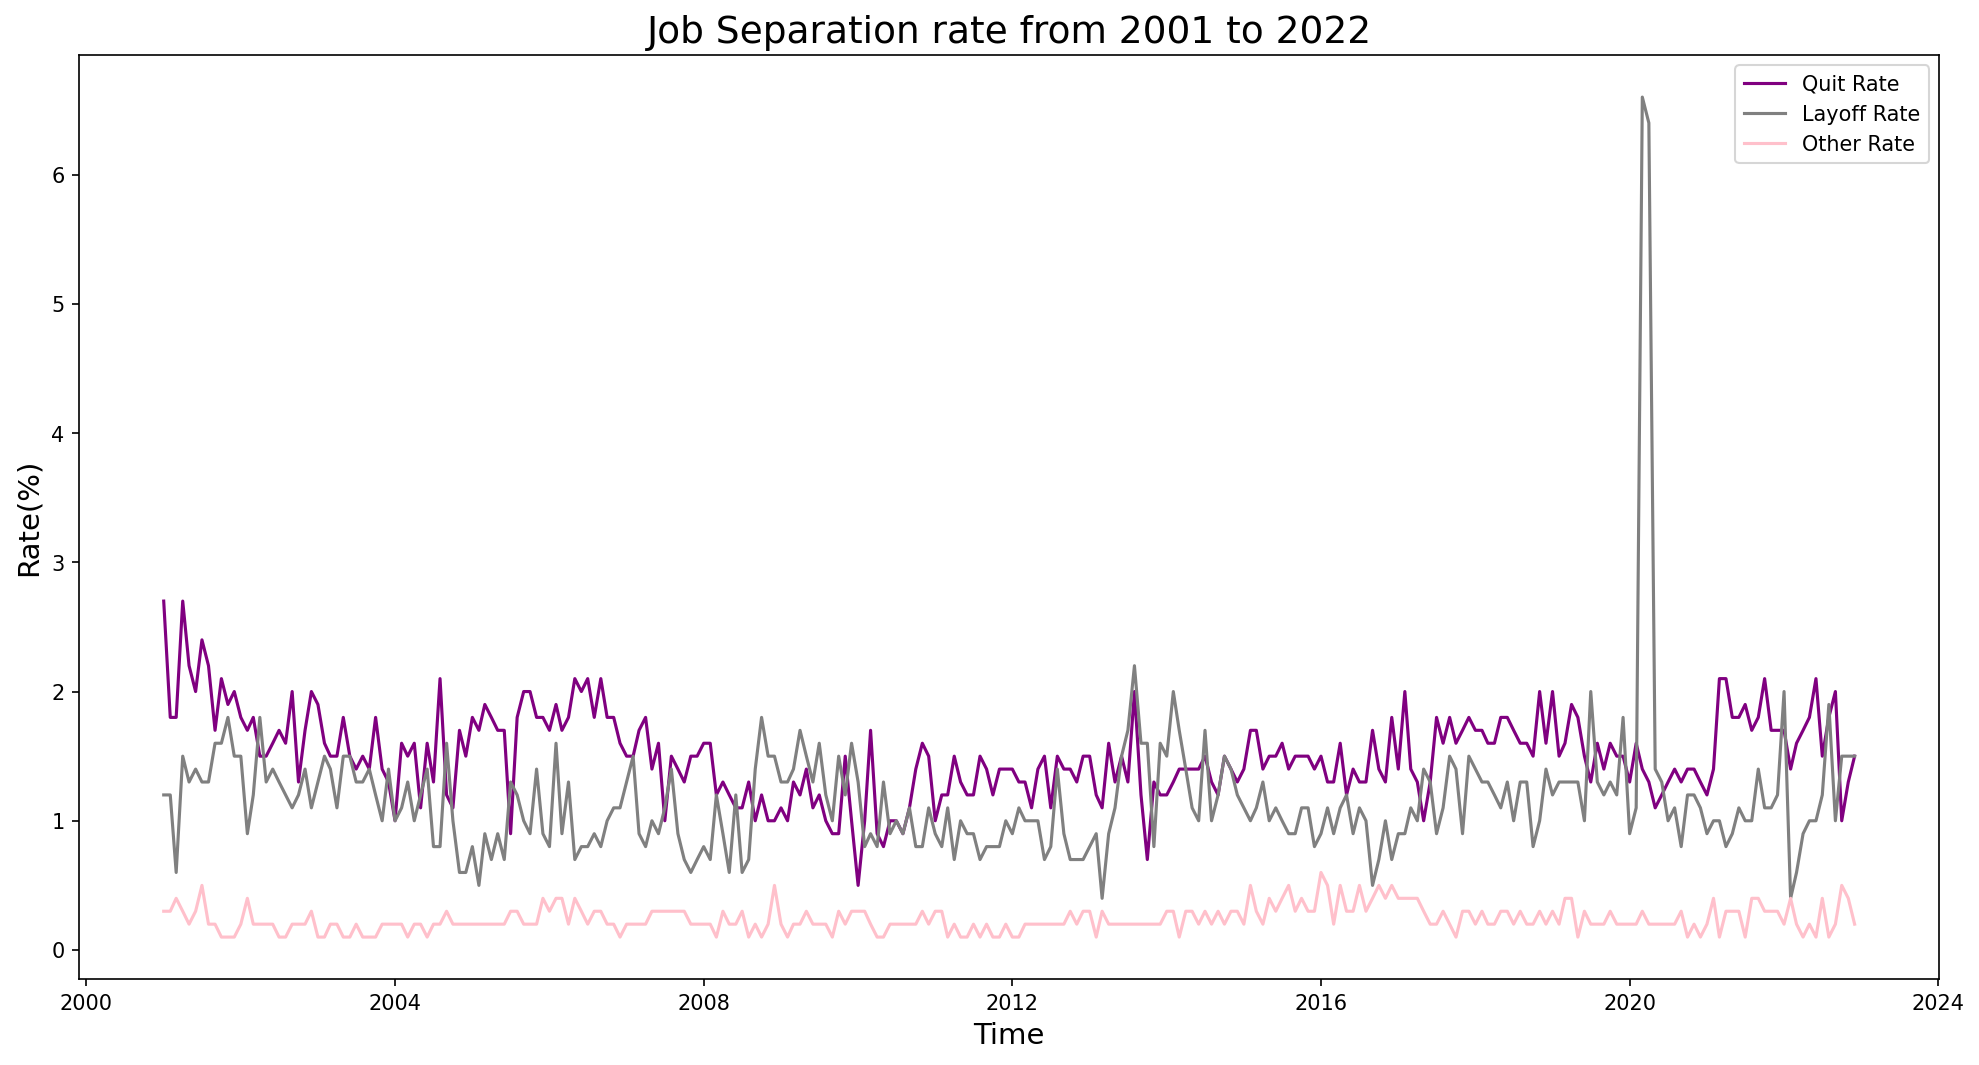

In [15]:
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)

#plot individual lines with custom colors and labels
plt.plot(df2['date'],df2['Quits_Rate'], label='Quit Rate', color='purple')
plt.plot(df2['date'],df2['LayoffsDischarges_Rate'], label='Layoff Rate', color='grey')
plt.plot(df2['date'],df2['OtherSeparations_Rate'], label='Other Rate', color='pink')

#add legend
plt.legend()

#add axes labels and a title
plt.ylabel('Rate(%)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Job Separation rate from 2001 to 2022', fontsize=18)

#display plot
plt.show()

In [14]:
corr2=df2.corr()

<AxesSubplot:>

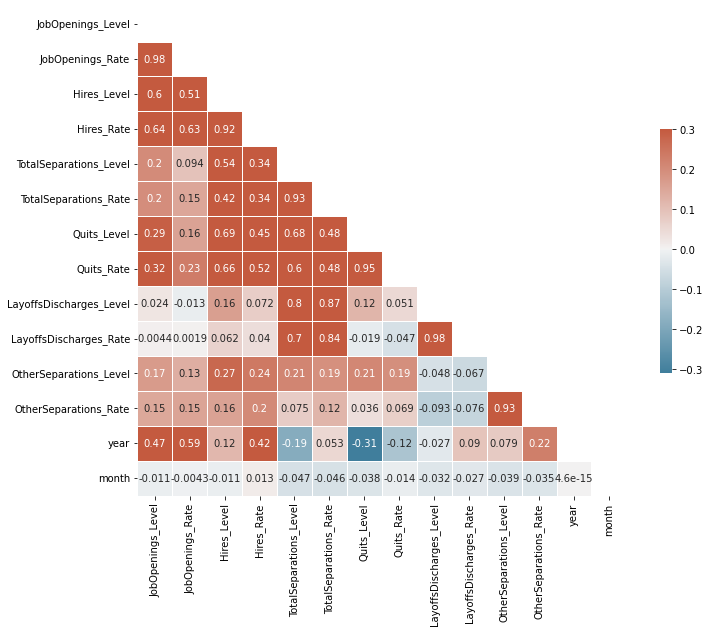

In [15]:
# Create mask
mask = np.triu(np.ones_like(corr2, dtype=bool))


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr2, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
import sweetviz as sv
analyze_report = sv.analyze(df2)
analyze_report.show_html('analyze_Information.html', open_browser=False)

                                             |                                             | [  0%]   00:00 ->…

Report analyze_Information.html was generated.



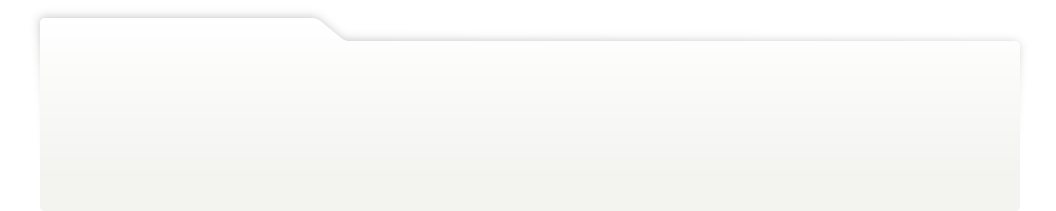
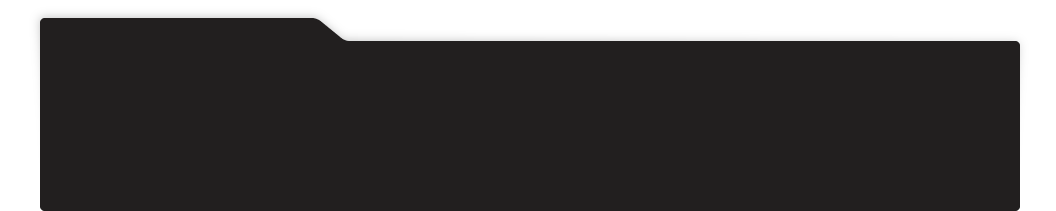
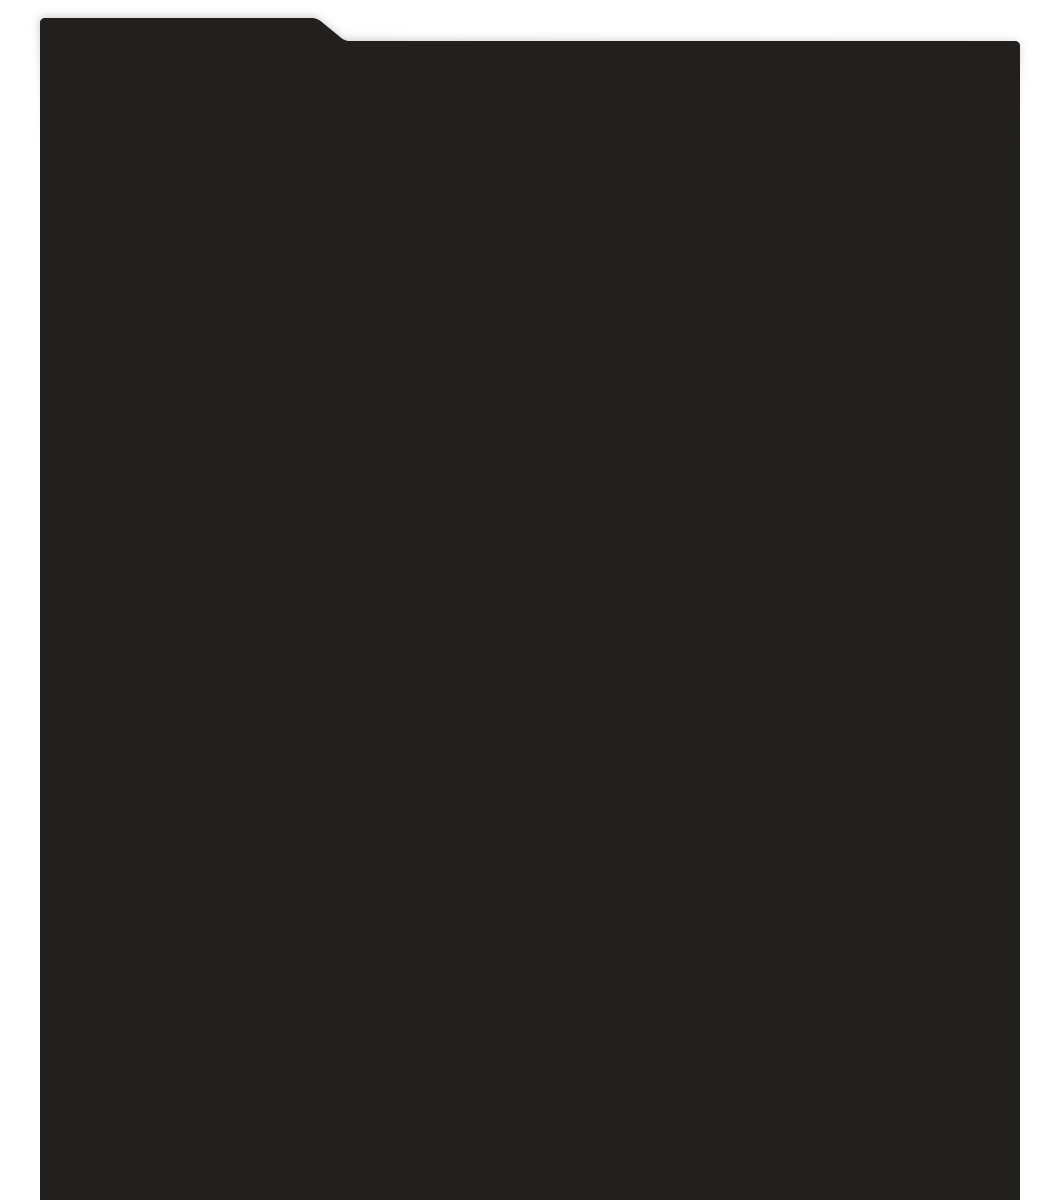
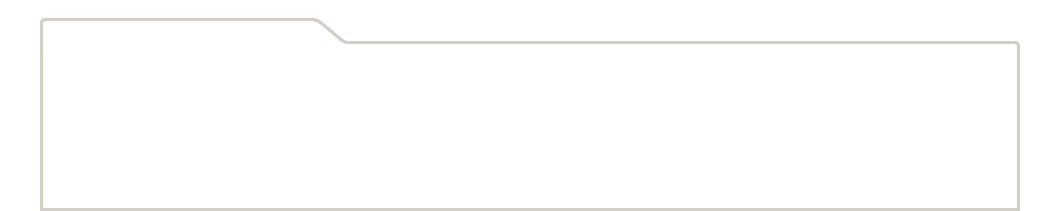
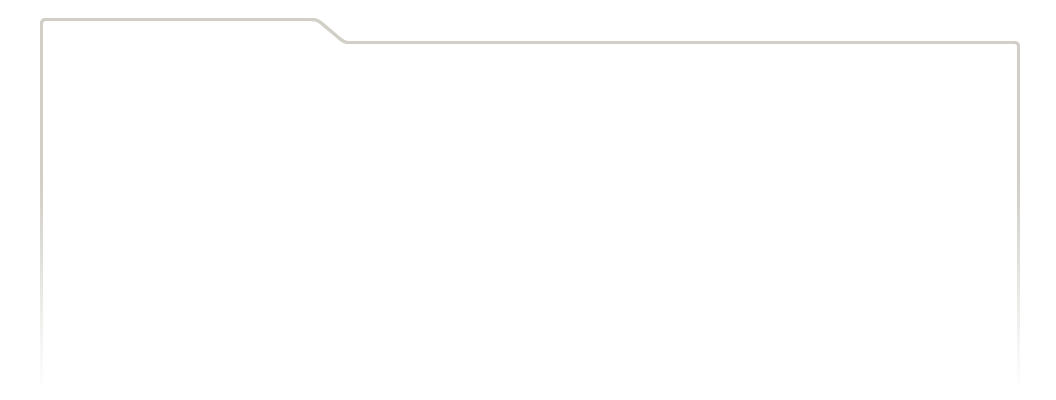
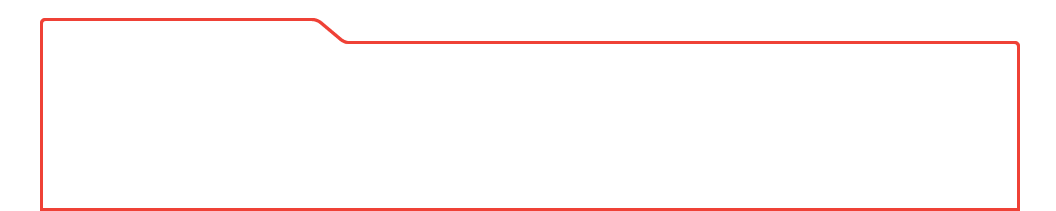
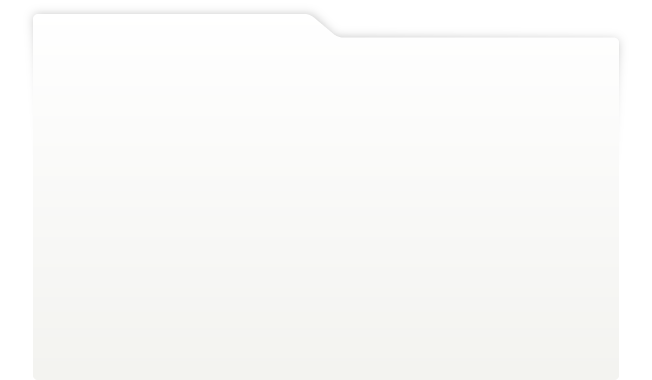
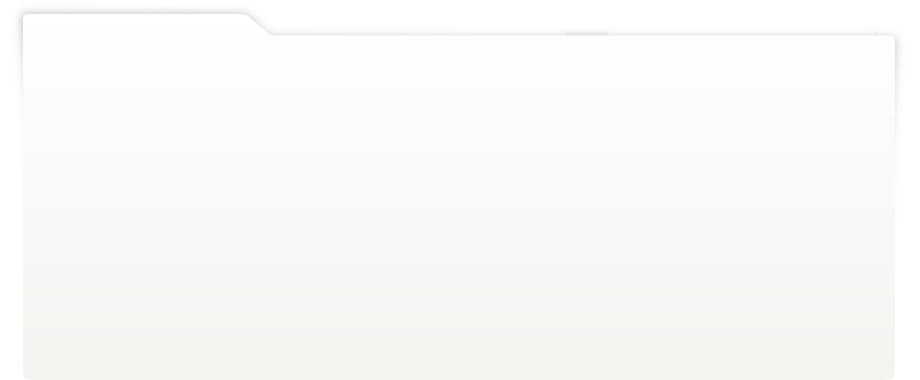
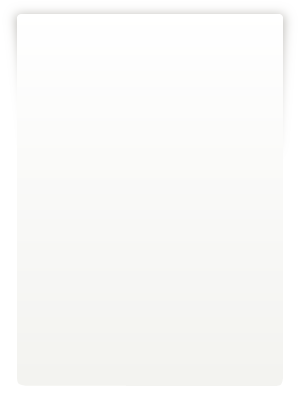
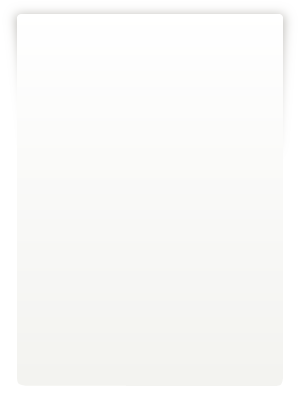
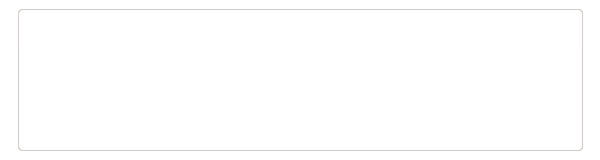
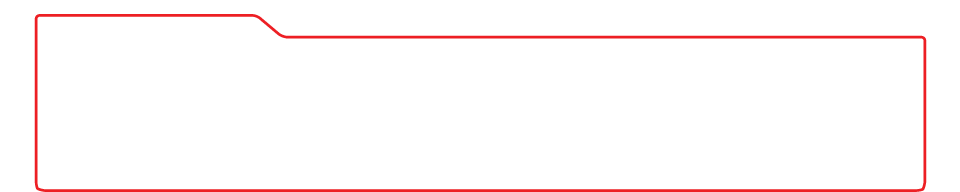
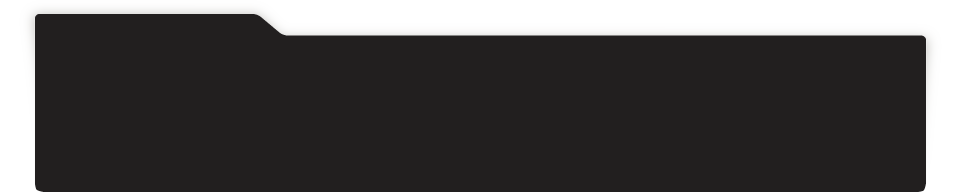
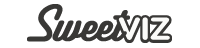
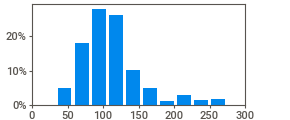
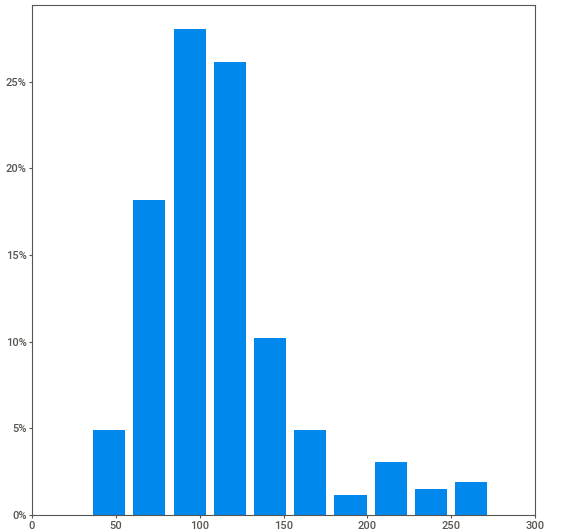
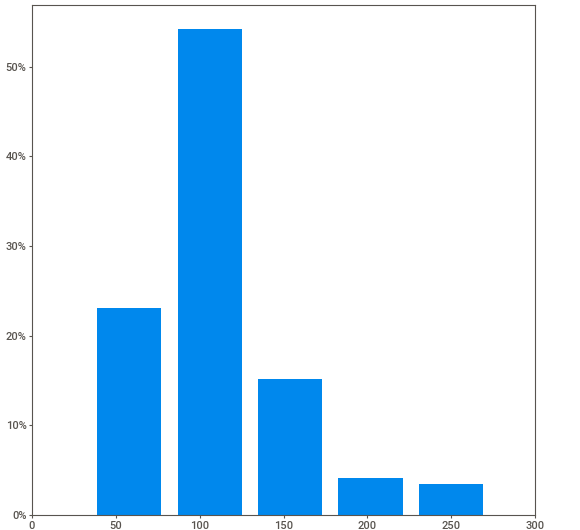
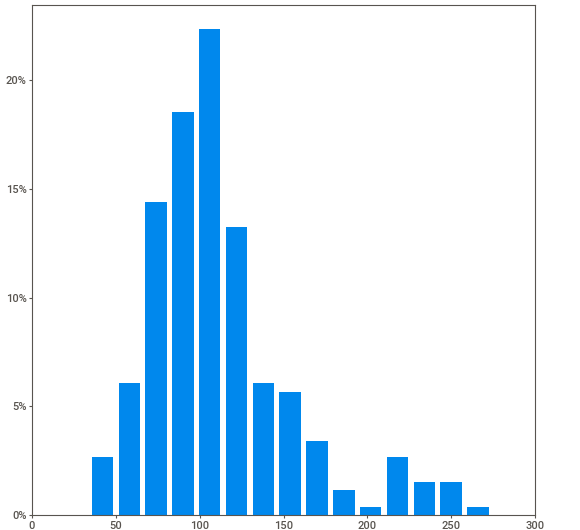
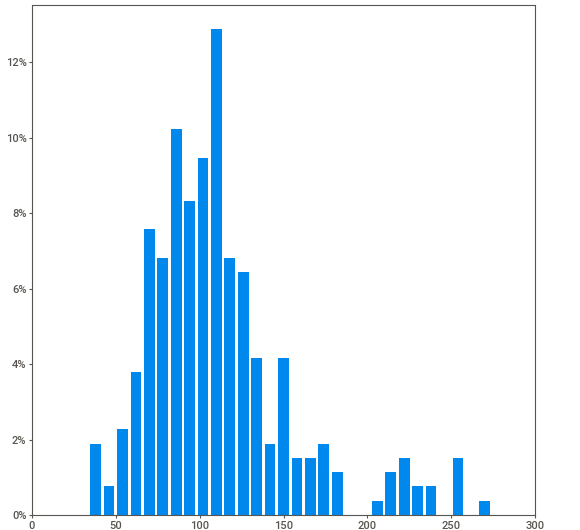
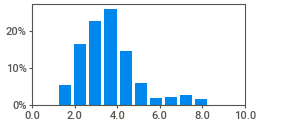
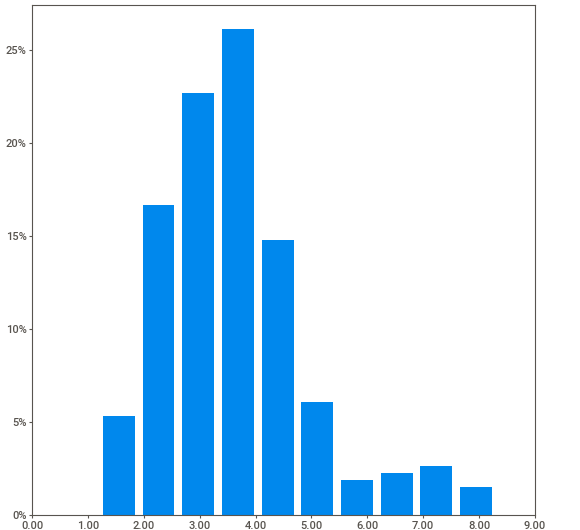
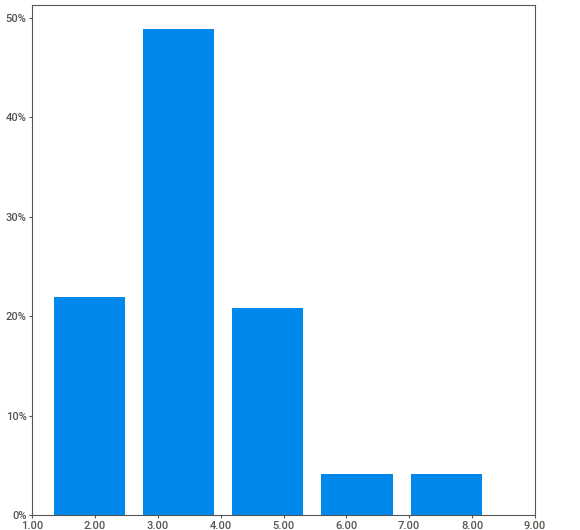
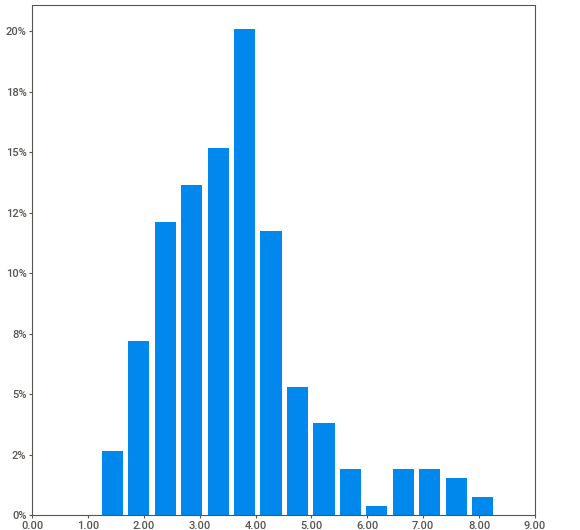
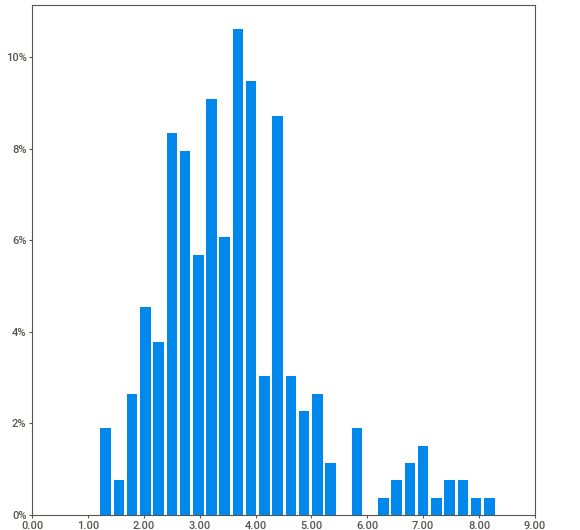
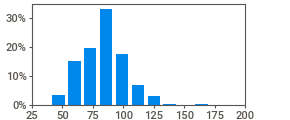
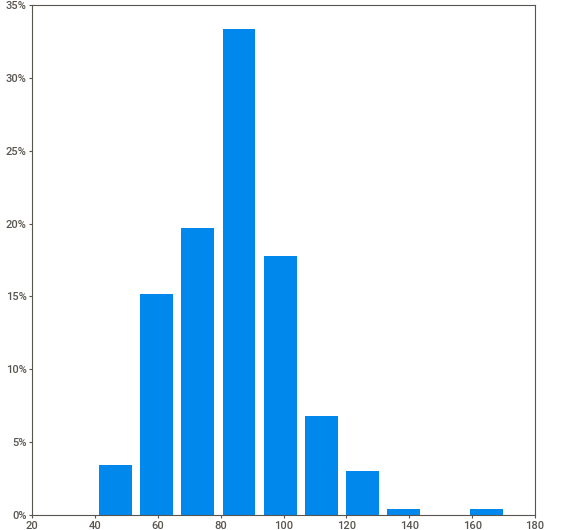
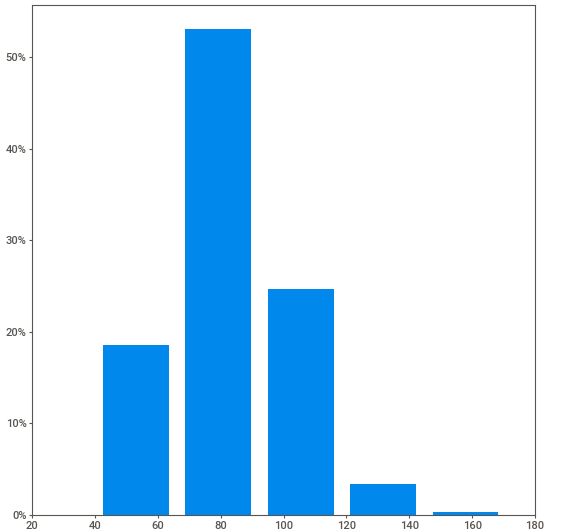
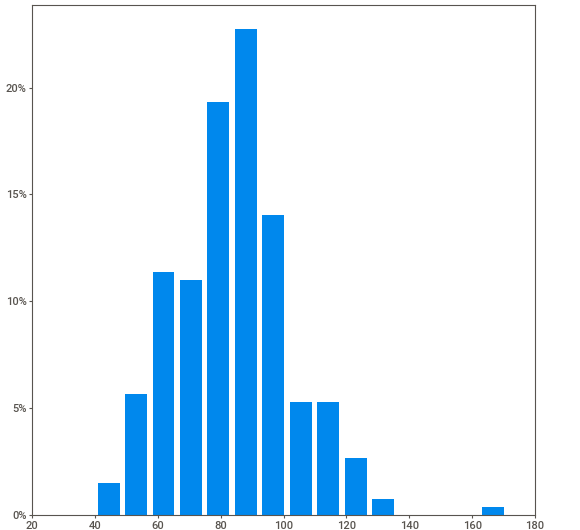
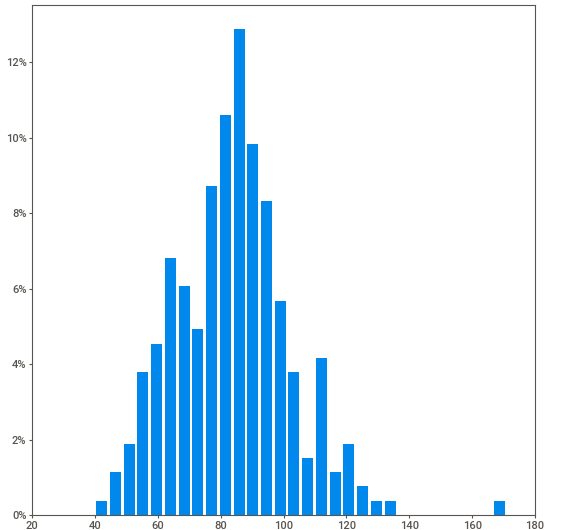
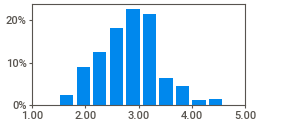
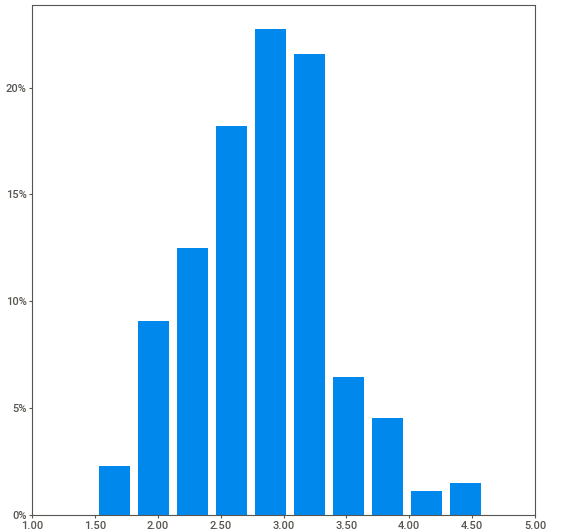
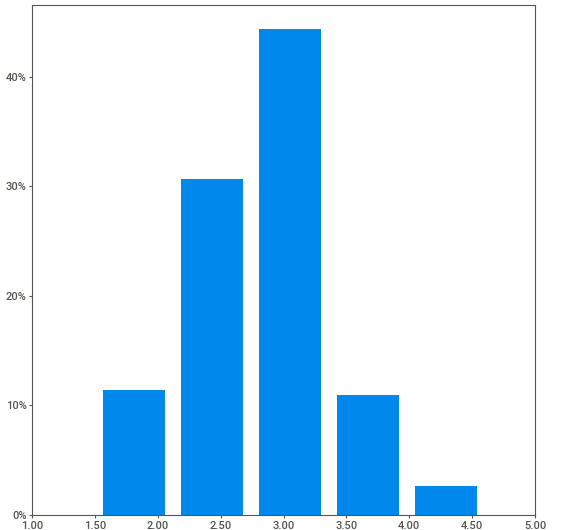
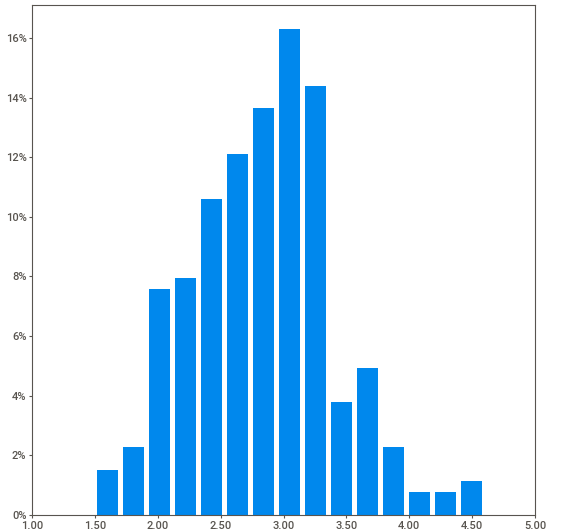
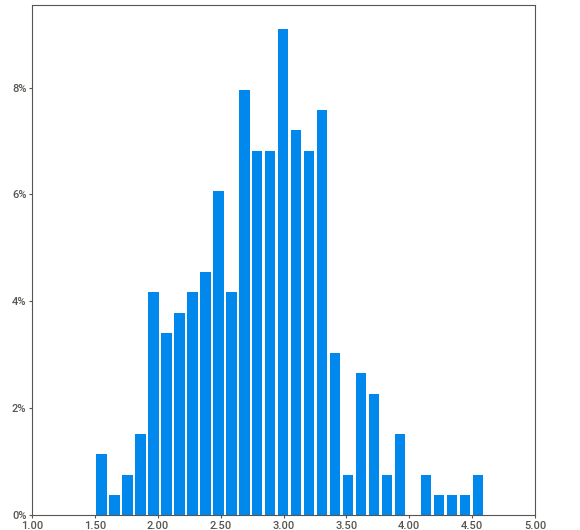
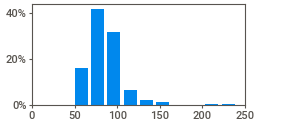
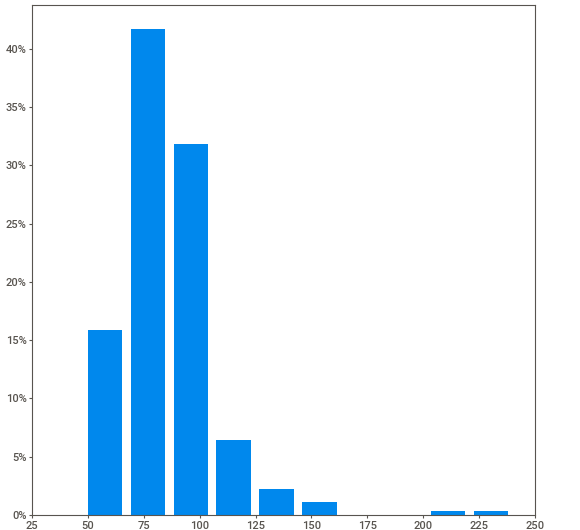
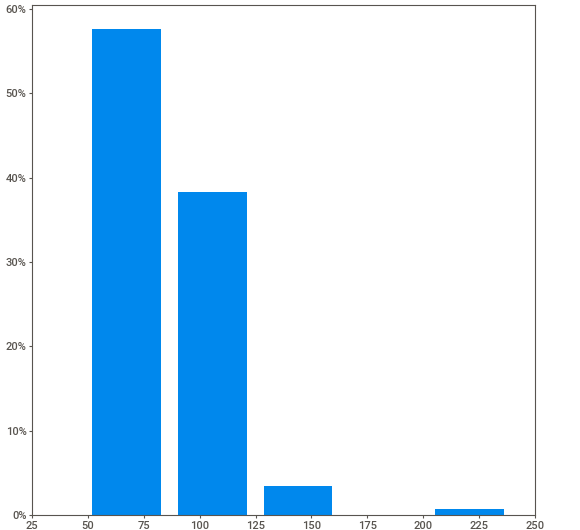
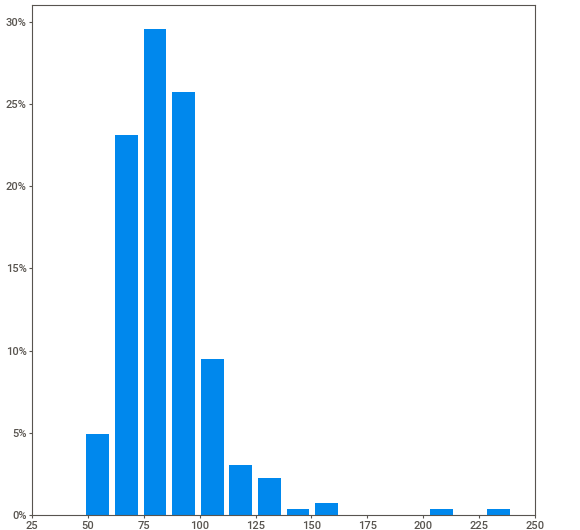
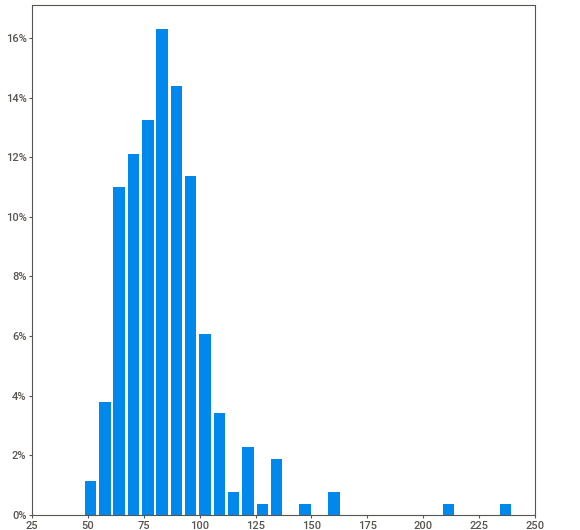
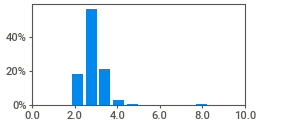
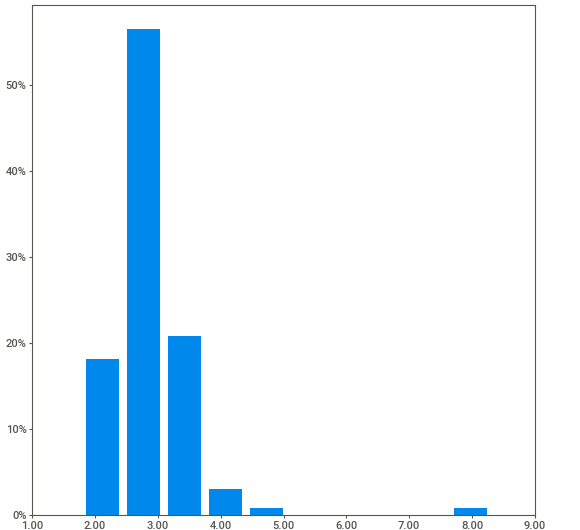
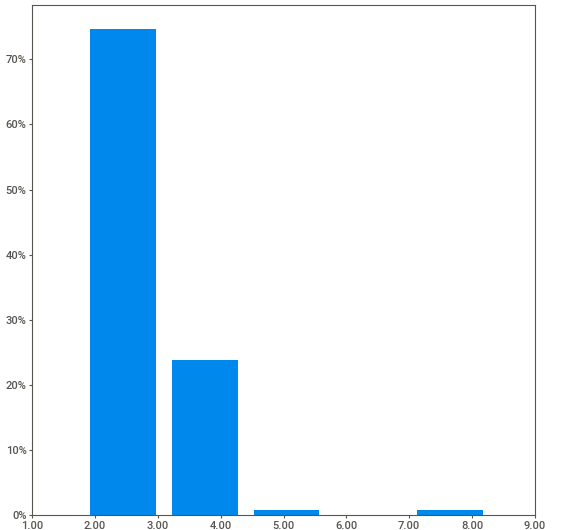
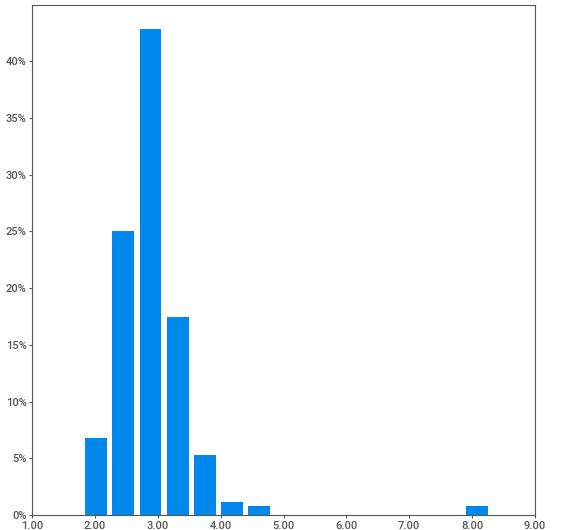
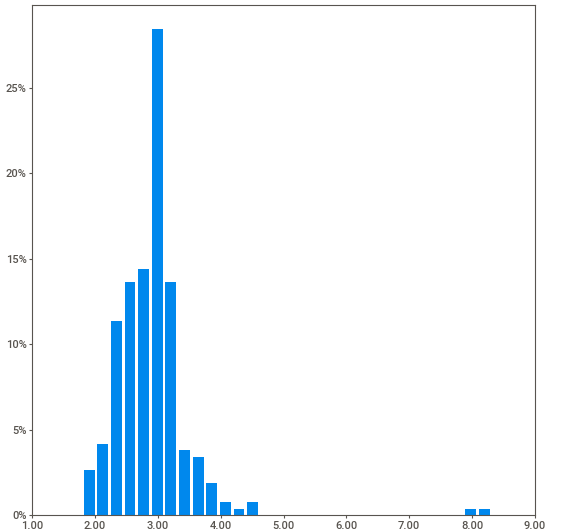
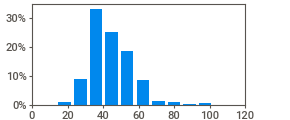
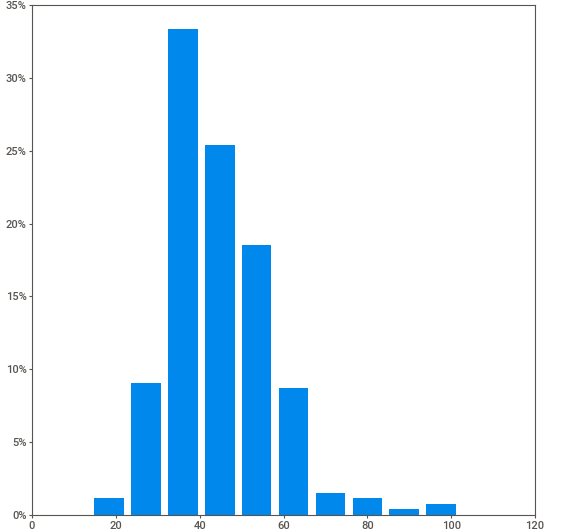
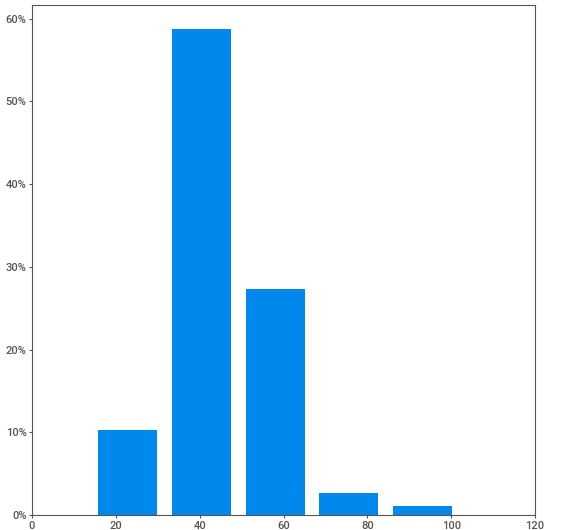
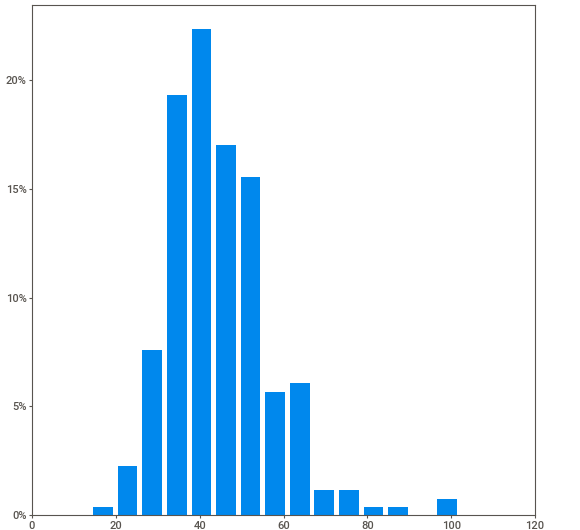
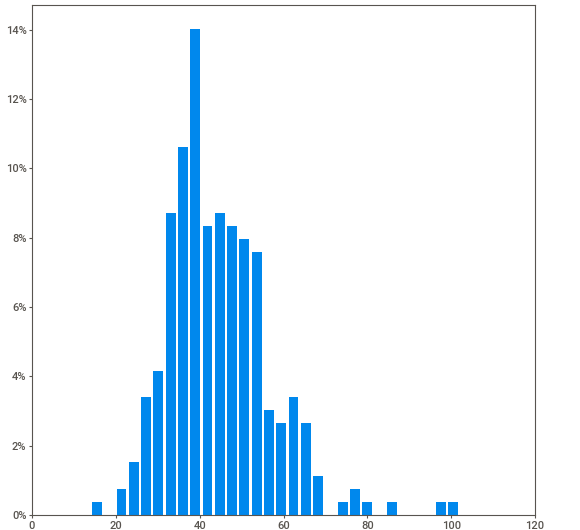
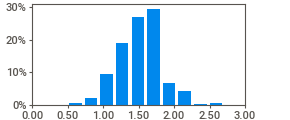
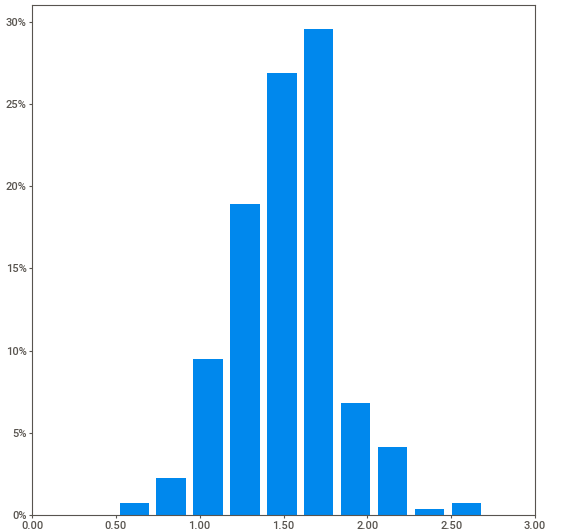
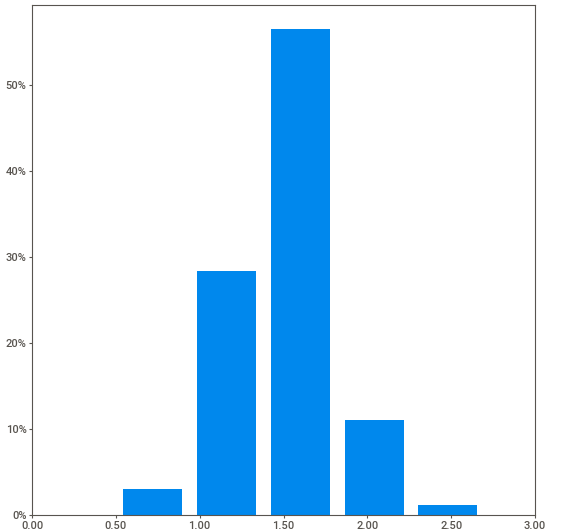
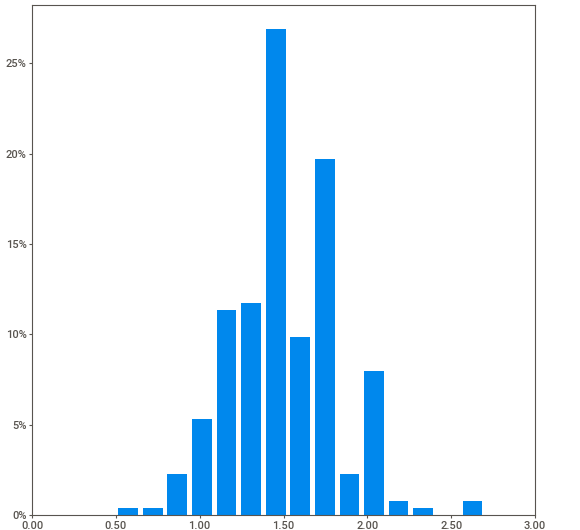
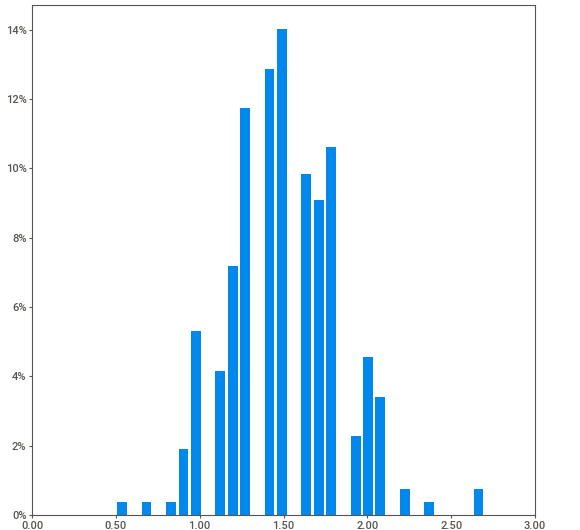
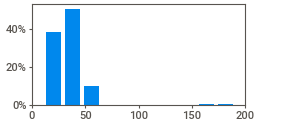
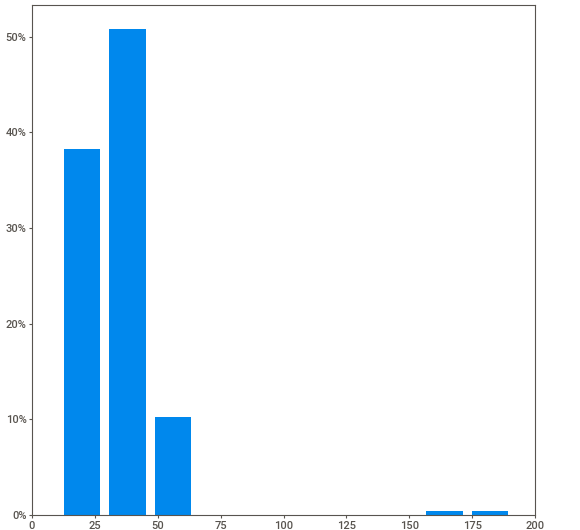
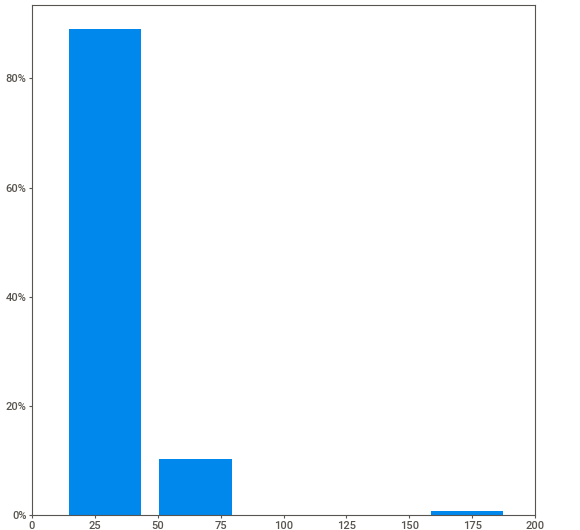
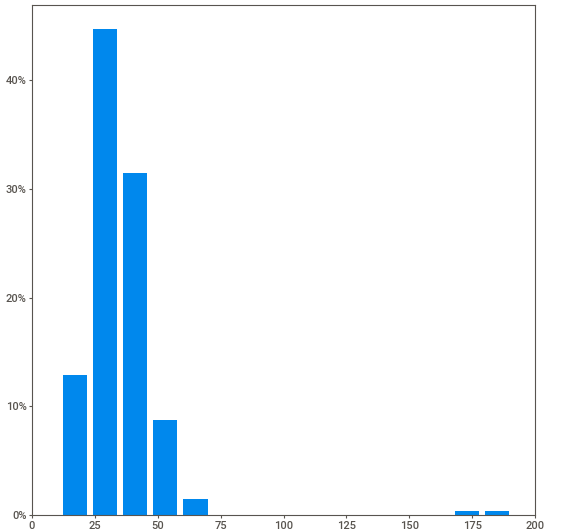
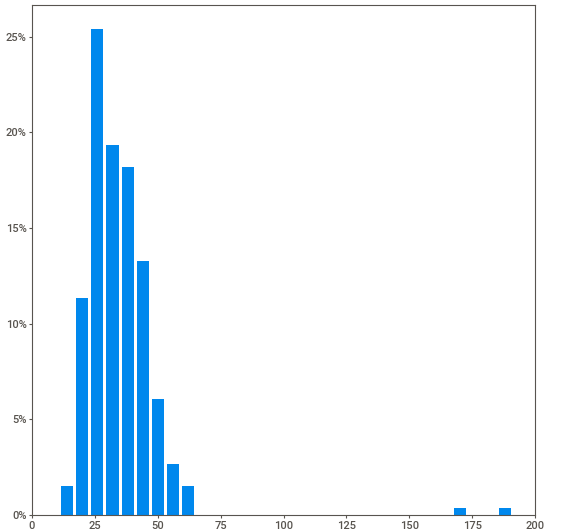
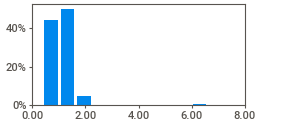
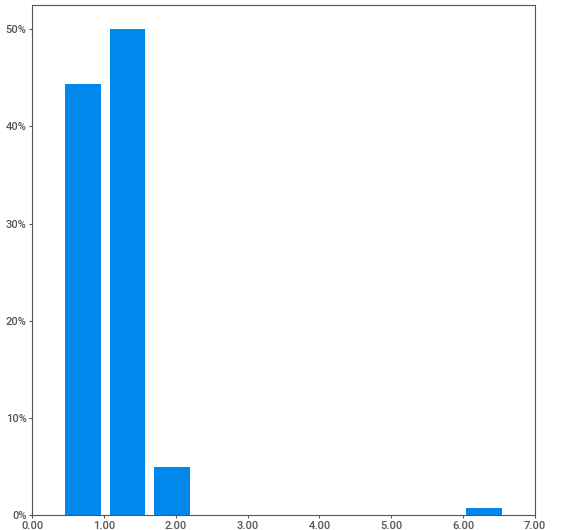
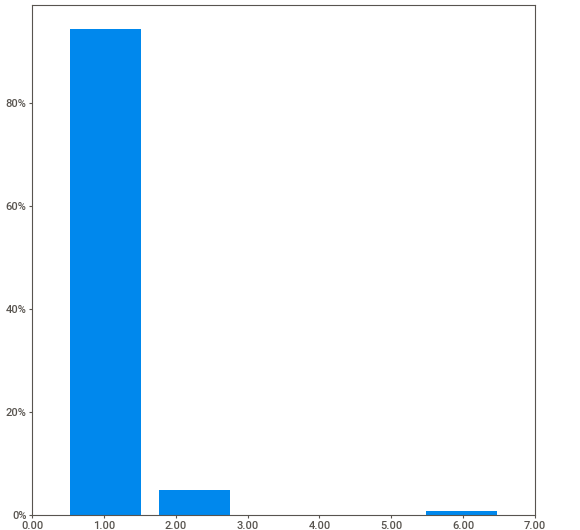
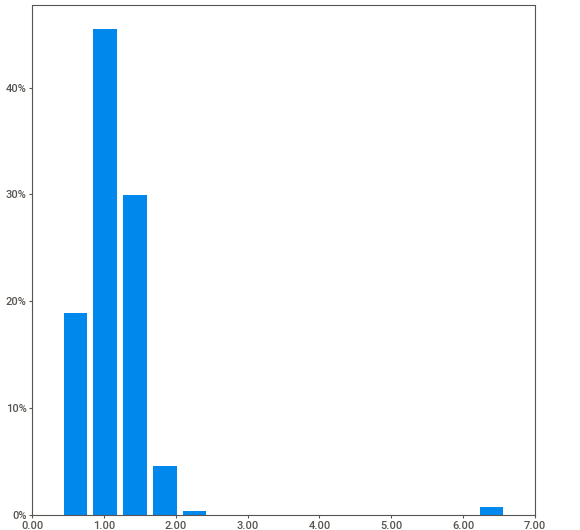
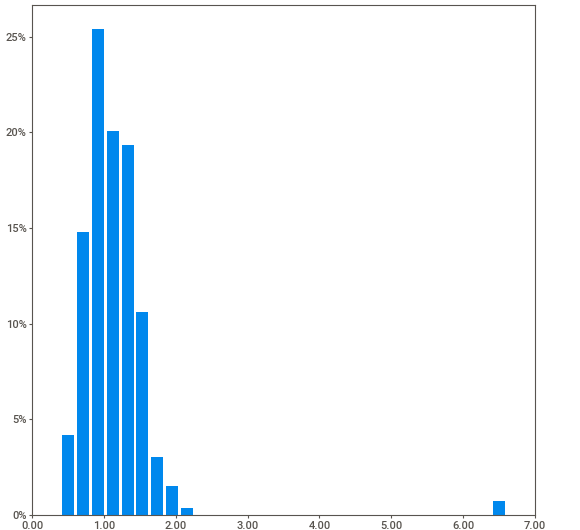
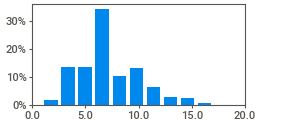
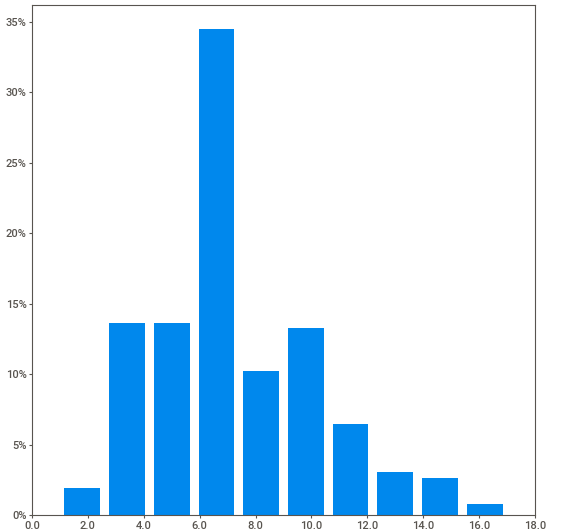
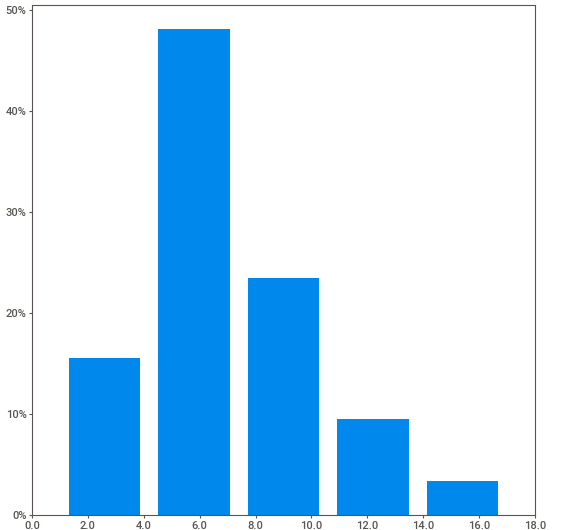
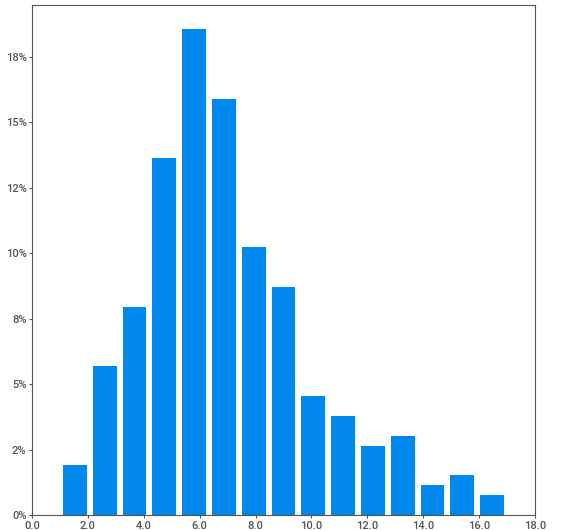
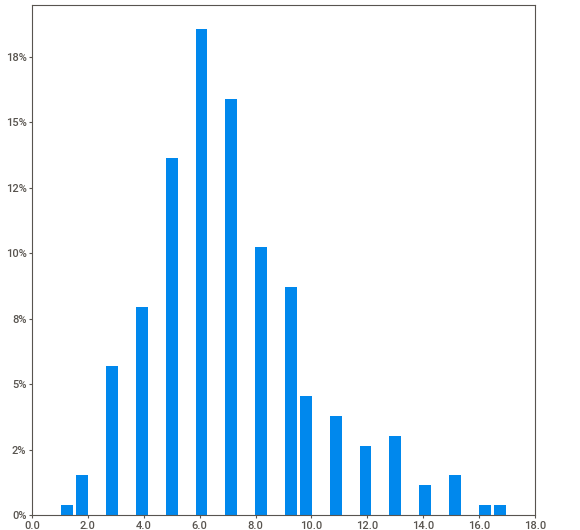
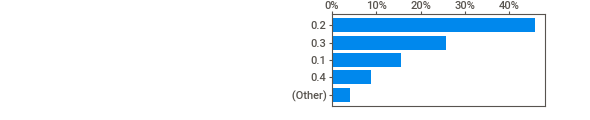
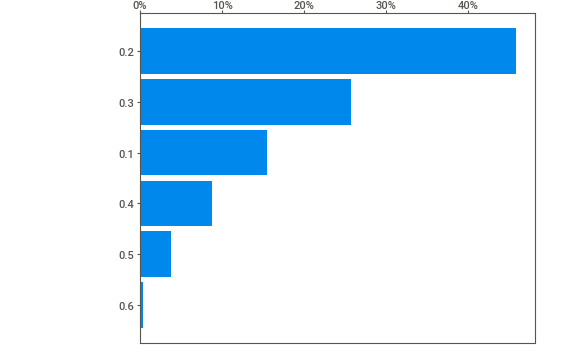
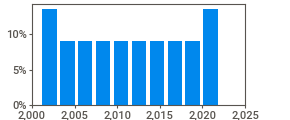
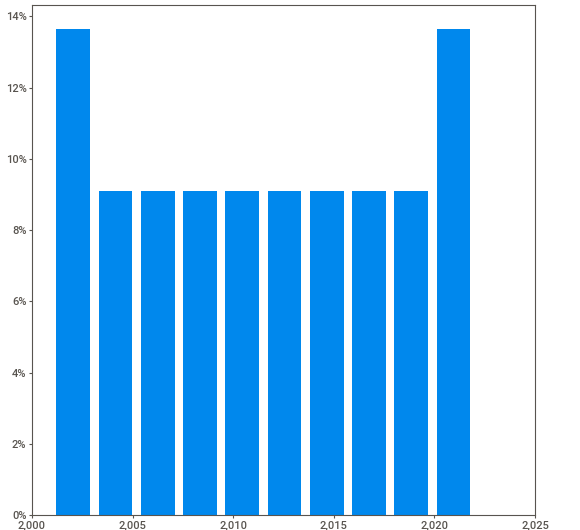
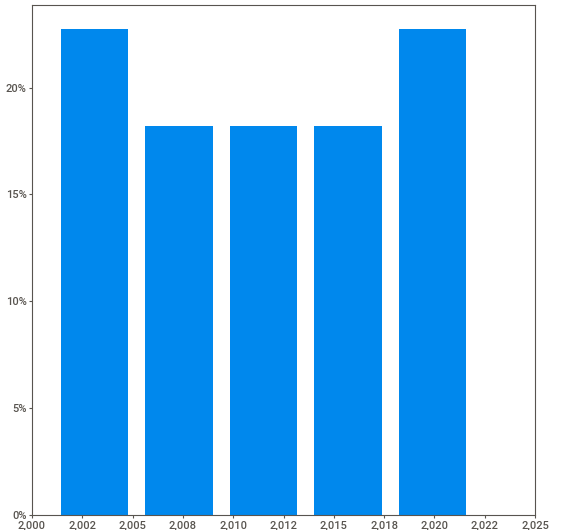
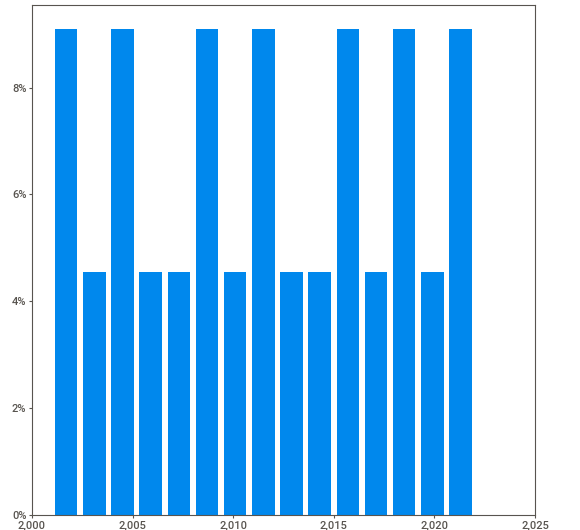
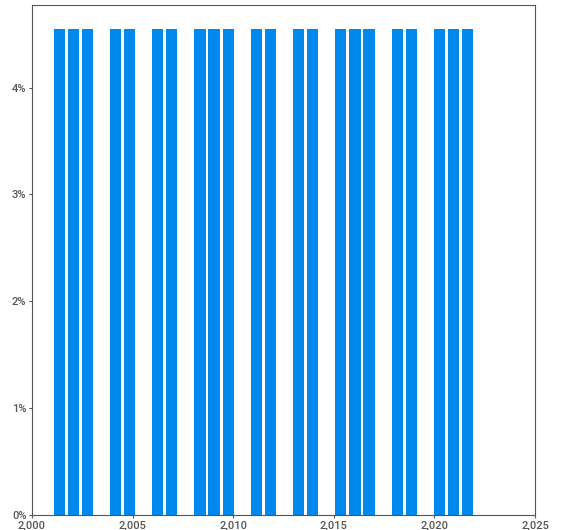
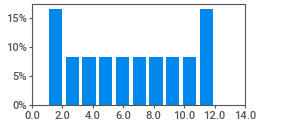
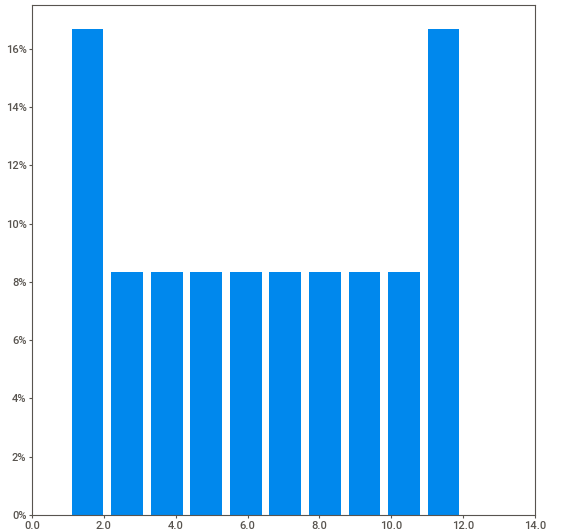
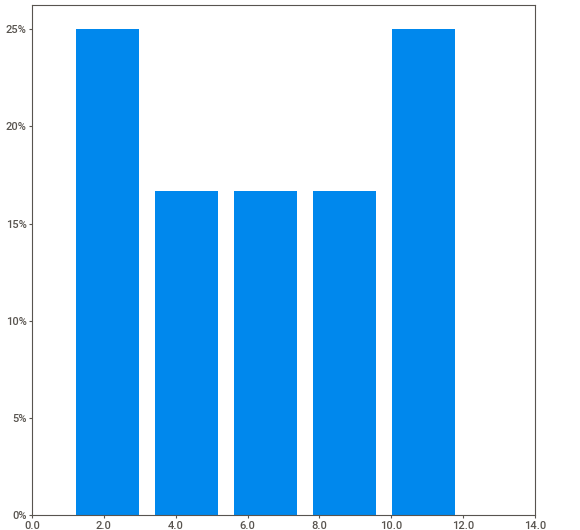
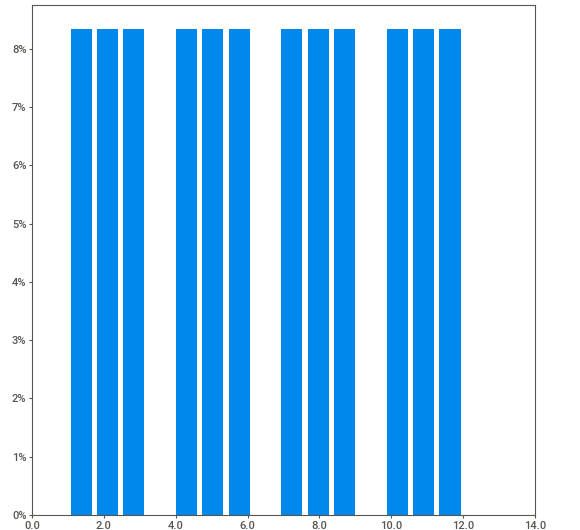
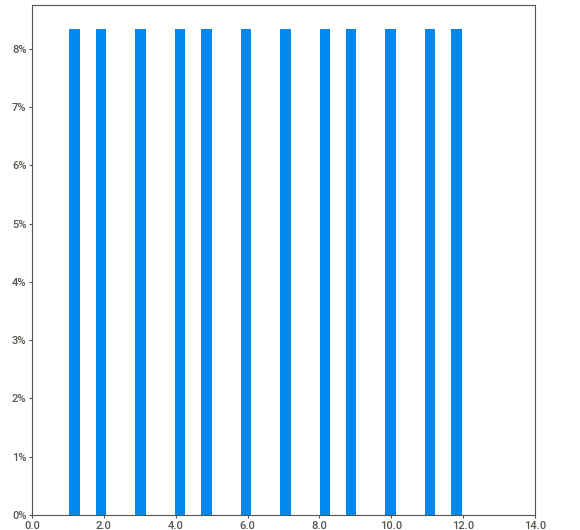
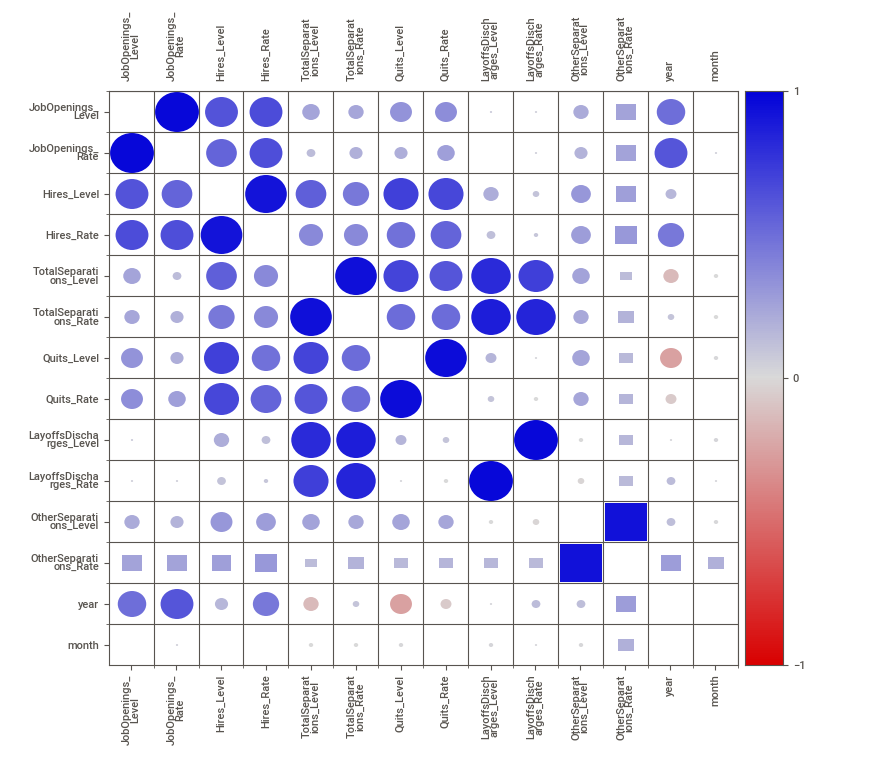
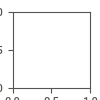

In [17]:
import IPython
IPython.display.HTML('analyze_Information.html')

## Extact data only from last decade (2012-2022) (label as df3)

In [18]:
df3 = df[(df['year'] <= 2022) & (df['year'] > 2011)]

In [19]:
df3.describe()

,JobOpenings_Level,JobOpenings_Rate,Hires_Level,Hires_Rate,TotalSeparations_Level,TotalSeparations_Rate,Quits_Level,Quits_Rate,LayoffsDischarges_Level,LayoffsDischarges_Rate,OtherSeparations_Level,OtherSeparations_Rate,year,month
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.00000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,127.030303,4.278030,87.310606,3.106061,84.250000,3.004545,42.310606,1.503030,34.44697,1.225758,7.553030,0.267424,2017.000000,6.500000
std,46.381251,1.310924,15.905797,0.500039,21.643671,0.748929,7.871228,0.252904,20.34148,0.729386,2.950778,0.106646,3.174324,3.465203
min,66.000000,2.400000,40.000000,1.500000,50.000000,1.900000,20.000000,0.700000,11.00000,0.400000,1.000000,0.100000,2012.000000,1.000000
25%,99.750000,3.500000,78.750000,2.800000,73.000000,2.700000,37.000000,1.300000,26.00000,0.900000,5.750000,0.200000,2014.000000,3.750000
50%,112.500000,3.900000,86.000000,3.100000,82.000000,3.000000,40.500000,1.500000,31.00000,1.100000,7.000000,0.250000,2017.000000,6.500000
75%,135.500000,4.500000,96.000000,3.300000,91.000000,3.200000,47.000000,1.700000,38.00000,1.300000,9.000000,0.300000,2020.000000,9.250000
max,274.000000,8.300000,131.000000,4.500000,240.000000,8.300000,65.000000,2.100000,191.00000,6.600000,16.000000,0.600000,2022.000000,12.000000


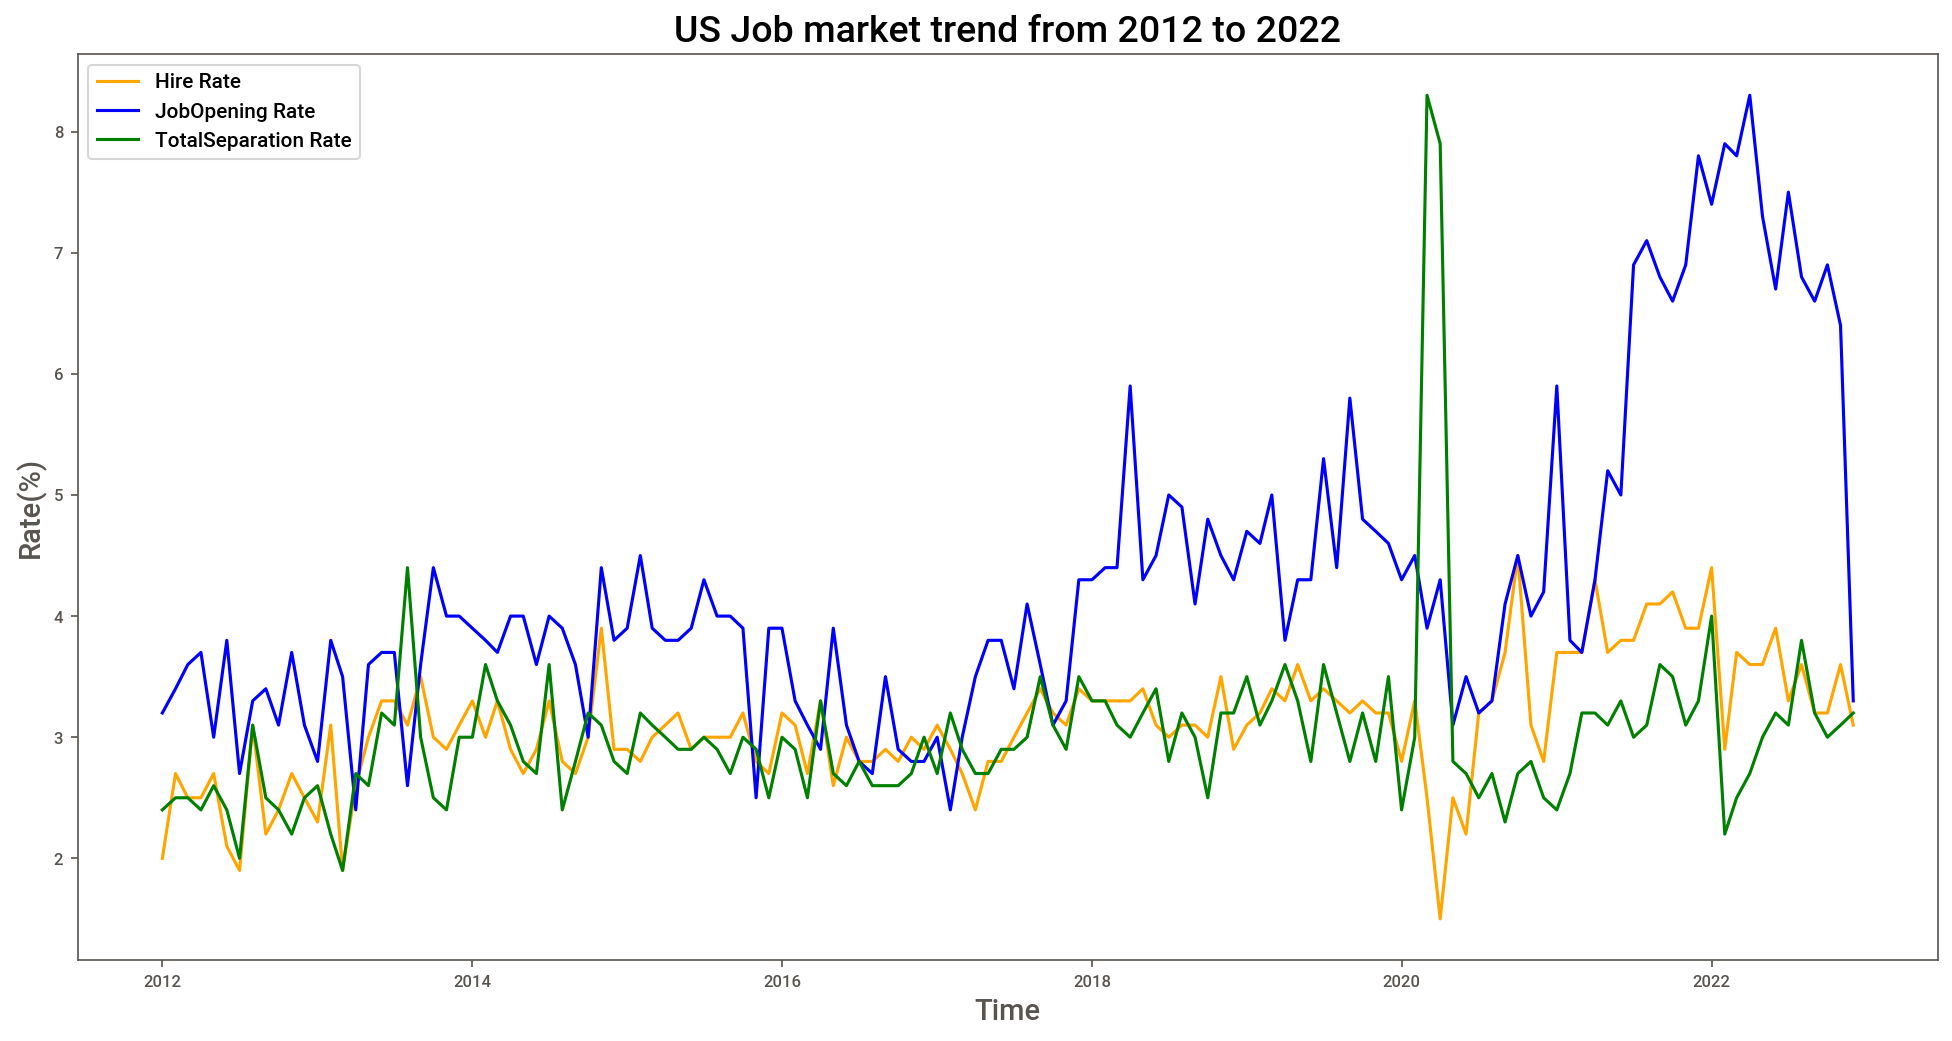

In [20]:
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
#plot individual lines with custom colors and labels
plt.plot(df3['date'],df3['Hires_Rate'], label='Hire Rate', color='orange')
plt.plot(df3['date'],df3['JobOpenings_Rate'], label='JobOpening Rate', color='blue')
plt.plot(df3['date'],df3['TotalSeparations_Rate'], label='TotalSeparation Rate', color='green')

#add legend
plt.legend()

#add axes labels and a title
plt.ylabel('Rate(%)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('US Job market trend from 2012 to 2022', fontsize=18,fontweight='bold')

#display plot
plt.show()

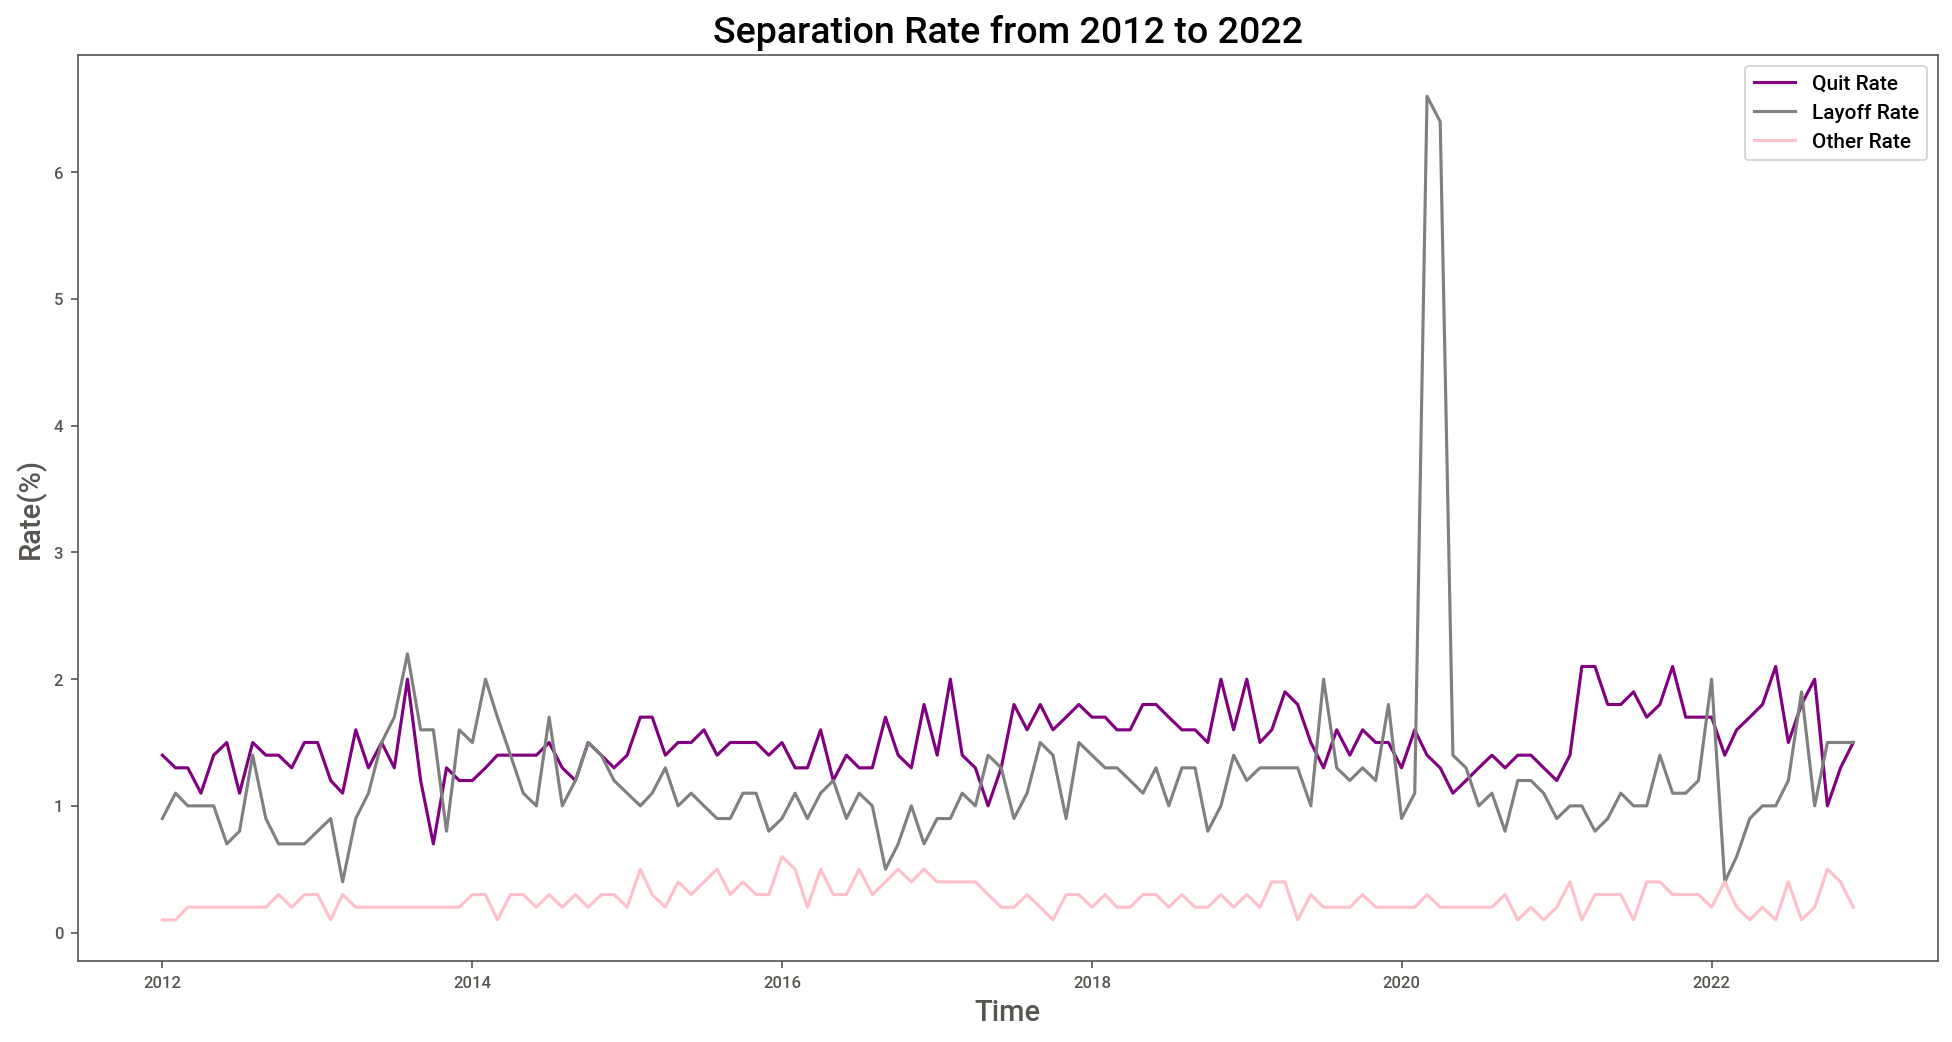

In [21]:
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
#plot individual lines with custom colors and labels
plt.plot(df3['date'],df3['Quits_Rate'], label='Quit Rate', color='purple')
plt.plot(df3['date'],df3['LayoffsDischarges_Rate'], label='Layoff Rate', color='grey')
plt.plot(df3['date'],df3['OtherSeparations_Rate'], label='Other Rate', color='pink')

#add legend
plt.legend()

#add axes labels and a title
plt.ylabel('Rate(%)', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Separation Rate from 2012 to 2022', fontsize=18,fontweight='bold')

#display plot
plt.show()

### Check Seasonality 

[Text(0.5, 1.0, 'Hire Rate by Month in 2012-2022')]

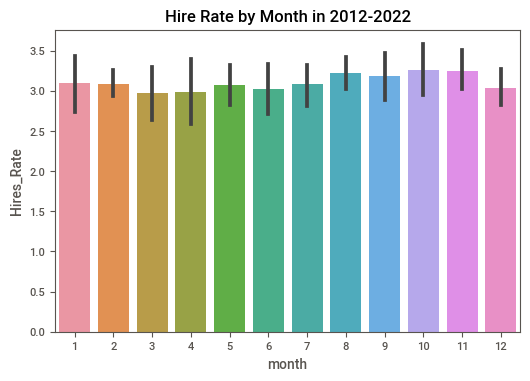

In [22]:
#fig = plt.figure(figsize = (8, 20))

# creating the bar plot
sns.barplot(x='month',y='Hires_Rate',data=df3).set(title='Hire Rate by Month in 2012-2022')

[Text(0.5, 1.0, 'Job Opening Rate by Month in 2012-2022')]

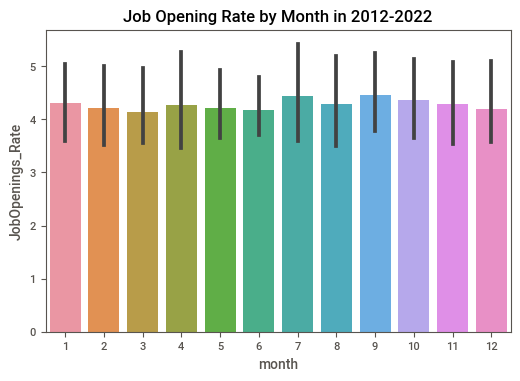

In [23]:
# creating the bar plot
sns.barplot(x='month',y='JobOpenings_Rate',data=df3).set(title='Job Opening Rate by Month in 2012-2022')

[Text(0.5, 1.0, 'Total Separations Rate by Month in 2012-2022')]

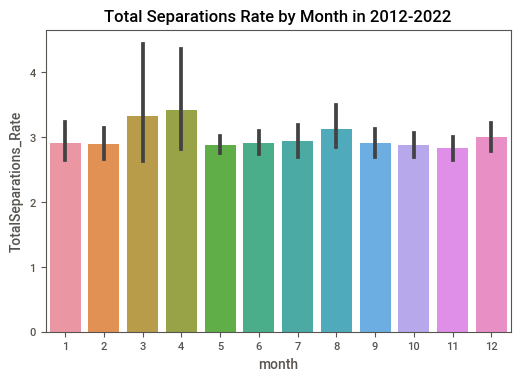

In [24]:
# creating the bar plot
sns.barplot(x='month',y='TotalSeparations_Rate',data=df3).set(title='Total Separations Rate by Month in 2012-2022')

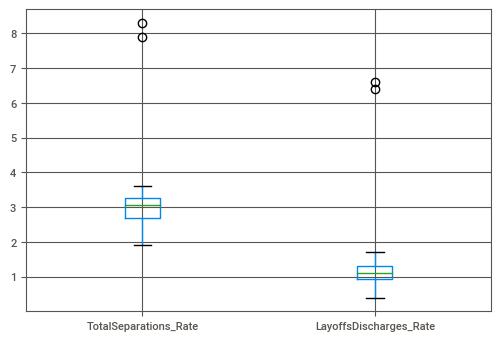

In [25]:
m0304=[3,4]
df3_m0304=df3[df3['month'].isin(m0304)]
df3_m0304
boxplot = df3_m0304.boxplot(column=['TotalSeparations_Rate','LayoffsDischarges_Rate'])  

### Correlations

In [26]:
corr3=df3.corr()

<AxesSubplot:>

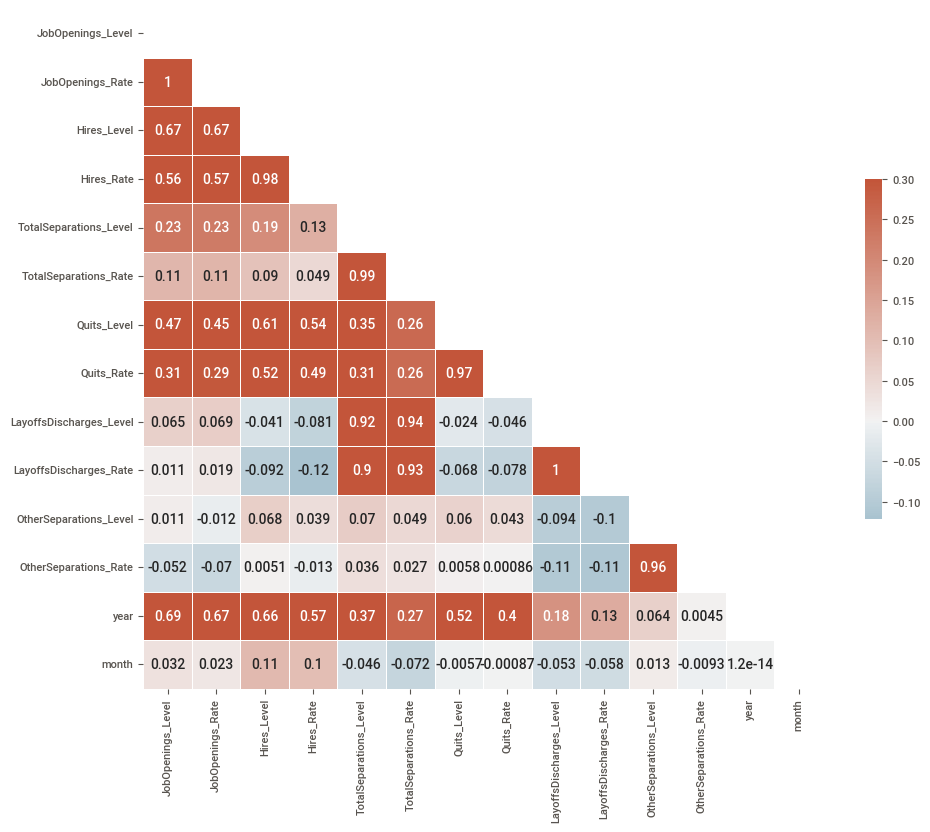

In [27]:
# Create mask
mask = np.triu(np.ones_like(corr3, dtype=bool))


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr3, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})

# EDA Summary 
- 1.Job Openings Rate: The rate fluctuates over time, ranging from a low of 2.4% in January 2012 to a high of 8.3% in March 2020. This indicates variations in labor market conditions and the demand for new hires.

- 2.Hires Rate:The rate ranges from a low of 1.5% in April 2020 to a high of 4.5% in October 2020. Higher hires rates generally indicate a stronger job market.

- 3.Total Separations Rate: The total separations rate includes all types of employment separations, such as quits, layoffs, and other separations. The rate varies over time, reaching a peak of 8.3% in March 2020 and declining to 2.3% in September 2020. This suggests significant disruptions in employment during the COVID-19 pandemic.

- 4.Quits Rate: The quits rate represents the number of quits as a percentage of total employment. It indicates the level of confidence and mobility in the job market. The rate ranges from a low of 0.7% in October 2013 to a high of 2% in September 2019. Higher quits rates can indicate increased job opportunities and workers voluntarily leaving their current positions.

- 5.Layoffs and Discharges Rate: The layoffs and discharges rate shows the number of involuntary separations as a percentage of total employment. It indicates the rate at which people are being laid off or discharged from their jobs. The rate reaches its peak at 6.6% in March 2020, reflecting the impact of the COVID-19 pandemic on the labor market.

- 6.Other Separations Rate: The other separations rate includes separations other than quits and layoffs. It represents various types of employment separations, such as retirements and transfers. The rate remains relatively stable over time, indicating a consistent pattern of other types of separations in the labor market.

- Overall Trend: The dataset shows fluctuations in job openings, hires, and separations rates over time. There is a notable decline in these rates during the COVID-19 pandemic, reflecting the economic impact and uncertainty caused by the crisis. However, the rates show signs of recovery and stabilization in later periods.

- These insights provide an overview of the dynamics within the labor market, indicating shifts in employment conditions, job market trends, and the impact of external factors such as the COVID-19 pandemic.

# If there is a trend in JobOpenings/ Hire Rates/ Seperation Rates from last decade ?
## Hypothesis 
#### Null hypothesis: There is no trend in JOLTS data for tech jobs
#### Alternative hypothesis:  There is a trend in JOLTS data for tech jobs

#### The Mann-Kendall Trend Test is used to determine whether or not a trend exists in time series data. It is a non-parametric test, meaning there is no underlying assumption made about the normality of the data.

In [28]:
import pymannkendall as mk

import statsmodels.api as sm

C:\Users\Henry\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Henry\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


### 1.JobOpenings_Level trend

In [29]:
df_JobOpening = df3.set_index('date')
df_JobOpening.drop(['month','year','JobOpenings_Rate','Hires_Level','Hires_Rate','TotalSeparations_Level','TotalSeparations_Rate','Quits_Level','Quits_Rate','LayoffsDischarges_Level','LayoffsDischarges_Rate','OtherSeparations_Level','OtherSeparations_Rate'],axis=1, inplace=True)

In [30]:
#print(mk.original_test(df_JobOpening, alpha=0.05))

result = mk.original_test(df_JobOpening, alpha=0.05)
print(result)

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=8.429016247183021, Tau=0.4956049040018506, s=4285.0, var_s=258312.33333333334, slope=0.6, intercept=73.2)


In [31]:
df_JobOpening

,JobOpenings_Level
date,
2012-01-01,88
2012-02-01,95
2012-03-01,100
2012-04-01,104
2012-05-01,84
...,...
2022-08-01,227
2022-09-01,219
2022-10-01,230


In [32]:
df_JobOpening=df_JobOpening.reset_index()

In [33]:
import matplotlib.dates as dates

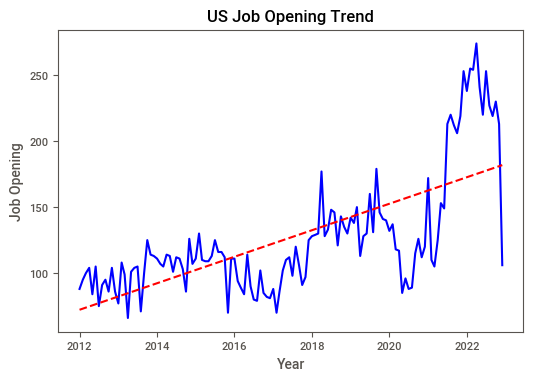

In [34]:
# add a trend line to a time series line chart
# one approach is to convert the dates using matplotlib's date2num() function and its counterpart the num2date function
#https://stackoverflow.com/questions/70852986/add-trend-line-to-datetime-matplotlib-line-graph

# Get values for the trend line analysis
x_dates = df_JobOpening['date']
x_num = dates.date2num(x_dates)

# Calculate a fit line
trend = np.polyfit(x_num, df_JobOpening['JobOpenings_Level'], 1)
fit = np.poly1d(trend)

# General plot again
plt.plot(x_dates, df_JobOpening['JobOpenings_Level'],color='blue')
plt.xlabel('Year')
plt.ylabel('Job Opening')
plt.title('US Job Opening Trend')

# Not really necessary to convert the values back into dates
#but added as a demonstration in case one wants to plot non-linear curves
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "r--")

# And show
plt.show()



### From this result, we can say that there is a significant trend in this dataset. Because the p-value is smaller than alpha=0.05 so h=True. The trend is “increasing” and the value of trend/slope is 0.22.

### 2.Hires_Level trend

In [35]:
df_Hire= df3.set_index('date')
df_Hire.drop(['month','year','JobOpenings_Level','JobOpenings_Rate','Hires_Rate','TotalSeparations_Level','TotalSeparations_Rate','Quits_Level','Quits_Rate','LayoffsDischarges_Level','LayoffsDischarges_Rate','OtherSeparations_Level','OtherSeparations_Rate'],axis=1, inplace=True)

In [36]:
print(mk.original_test(df_Hire, alpha=0.05))

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=8.813270293230774, Tau=0.5180430256766134, s=4479.0, var_s=258163.0, slope=0.2876712328767123, intercept=67.15753424657535)


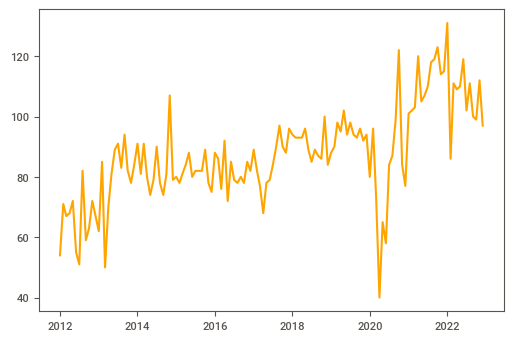

In [37]:
plt.plot(df_Hire,color='orange')

In [38]:
df_Hire

,Hires_Level
date,
2012-01-01,54
2012-02-01,71
2012-03-01,67
2012-04-01,68
2012-05-01,72
...,...
2022-08-01,111
2022-09-01,100
2022-10-01,99


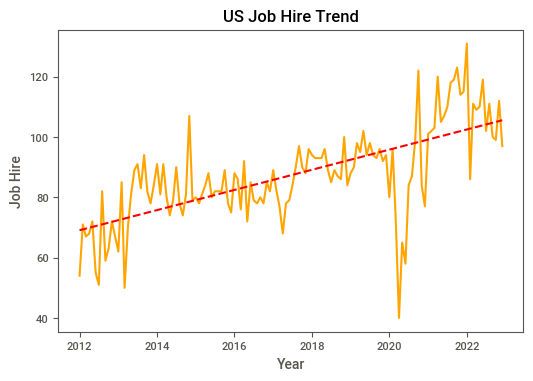

In [39]:
# add a trend line to a time series line chart
# one approach is to convert the dates using matplotlib's date2num() function and its counterpart the num2date function
#https://stackoverflow.com/questions/70852986/add-trend-line-to-datetime-matplotlib-line-graph

#reset the index first
df_Hire=df_Hire.reset_index()

# Get values for the trend line analysis
x_dates = df_Hire['date']
x_num = dates.date2num(x_dates)

# Calculate a fit line
trend = np.polyfit(x_num, df_Hire['Hires_Level'], 1)
fit = np.poly1d(trend)

# General plot again
plt.plot(x_dates, df_Hire['Hires_Level'],color='orange')
plt.xlabel('Year')
plt.ylabel('Job Hire')
plt.title('US Job Hire Trend')

# Not really necessary to convert the values back into dates
#but added as a demonstration in case one wants to plot non-linear curves
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "r--")

# And show
plt.show()


### 3.TotalSeparations_Level

In [40]:
df_TotalSeparation = df3.set_index('date')
df_TotalSeparation.drop(['month','year','JobOpenings_Level','JobOpenings_Rate','Hires_Level','Hires_Rate','TotalSeparations_Rate','Quits_Level','Quits_Rate','LayoffsDischarges_Level','LayoffsDischarges_Rate','OtherSeparations_Level','OtherSeparations_Rate'],axis=1, inplace=True)

In [41]:
print(mk.original_test(df_TotalSeparation, alpha=0.05))

Mann_Kendall_Test(trend='increasing', h=True, p=2.131052223575125e-09, z=5.987489103353625, Tau=0.3519546611149665, s=3043.0, var_s=258124.33333333334, slope=0.1875, intercept=69.71875)


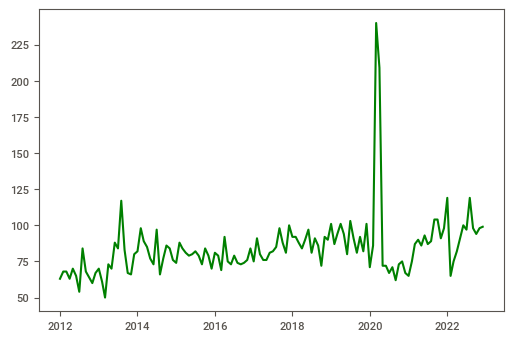

In [42]:
plt.plot(df_TotalSeparation,color='green')

In [43]:
df_TotalSeparation

,TotalSeparations_Level
date,
2012-01-01,63
2012-02-01,68
2012-03-01,68
2012-04-01,63
2012-05-01,70
...,...
2022-08-01,119
2022-09-01,98
2022-10-01,94


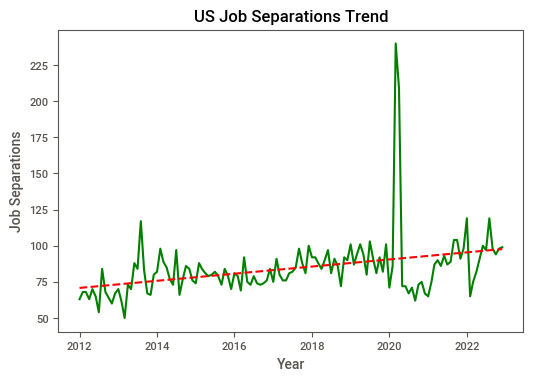

In [44]:
# add a trend line to a time series line chart
# one approach is to convert the dates using matplotlib's date2num() function and its counterpart the num2date function
#https://stackoverflow.com/questions/70852986/add-trend-line-to-datetime-matplotlib-line-graph

#reset the index first
df_TotalSeparation=df_TotalSeparation.reset_index()

# Get values for the trend line analysis
x_dates = df_TotalSeparation['date']
x_num = dates.date2num(x_dates)

# Calculate a fit line
trend = np.polyfit(x_num, df_TotalSeparation['TotalSeparations_Level'], 1)
fit = np.poly1d(trend)

# General plot again
plt.plot(x_dates, df_TotalSeparation['TotalSeparations_Level'],color='green')
plt.xlabel('Year')
plt.ylabel('Job Separations')
plt.title('US Job Separations Trend')

# Not really necessary to convert the values back into dates
#but added as a demonstration in case one wants to plot non-linear curves
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "r--")

# And show
plt.show()


# To find the next popular programming languages 

Using Mann_Kendall_Test to identify up or donward trends of GO, Rust and Kotlin languages

*Mann-Kendall Trend Statistical Test
The Mann-Kendall Trend Test is used to determine whether or not a trend exists in time series data. It does not require that the data be normally distributed or linear. It does require that there is no autocorrelation. 

In [45]:
#GOdesired
#create a datafram
data ={'Date':['2014-01-01','2016-01-01','2017-01-01','2018-01-01', '2019-01-01', '2020-01-01','2021-07-03','2022-01-01'],
       'GoFrequency': [0.11,0.14,0.21,0.27,0.24,0.26,0.23,0.24]}

go = pd.DataFrame(data)

# convert the date column to a datetime data type
go['Date'] = pd.to_datetime(go['Date'])

go= go.set_index('Date')

go


,GoFrequency
Date,
2014-01-01,0.11
2016-01-01,0.14
2017-01-01,0.21
2018-01-01,0.27
2019-01-01,0.24
2020-01-01,0.26
2021-07-03,0.23
2022-01-01,0.24


In [46]:
print(mk.original_test(go, alpha=0.05))

Mann_Kendall_Test(trend='no trend', h=False, p=0.1346252678522062, z=1.496108942862089, Tau=0.4642857142857143, s=13.0, var_s=64.33333333333333, slope=0.017333333333333336, intercept=0.1743333333333333)


In [47]:
#Rustdesired
#create a datafram
data ={'Date':['2017-01-01','2018-01-01','2019-01-01','2020-01-01','2021-07-03','2022-01-01'],
       'RustFrequency': [0.11,0.16,0.16,0.27,0.27,0.29]}

Rust = pd.DataFrame(data)

# convert the date column to a datetime data type
Rust['Date'] = pd.to_datetime(Rust['Date'])

Rust= Rust.set_index('Date')

Rust

,RustFrequency
Date,
2017-01-01,0.11
2018-01-01,0.16
2019-01-01,0.16
2020-01-01,0.27
2021-07-03,0.27
2022-01-01,0.29


In [48]:
print(mk.original_test(Rust, alpha=0.05))

Mann_Kendall_Test(trend='increasing', h=True, p=0.019363849765463348, z=2.3384512888618714, Tau=0.8666666666666667, s=13.0, var_s=26.333333333333332, slope=0.036666666666666674, intercept=0.12333333333333334)


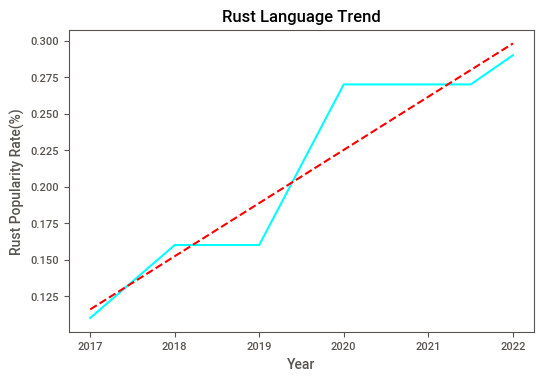

In [49]:
# add a trend line to a time series line chart
# one approach is to convert the dates using matplotlib's date2num() function and its counterpart the num2date function
#https://stackoverflow.com/questions/70852986/add-trend-line-to-datetime-matplotlib-line-graph

#reset the index first
Rust=Rust.reset_index()

# Get values for the trend line analysis
x_dates = Rust['Date']
x_num = dates.date2num(x_dates)

# Calculate a fit line
trend = np.polyfit(x_num, Rust['RustFrequency'], 1)
fit = np.poly1d(trend)

# General plot again
plt.plot(x_dates, Rust['RustFrequency'],color='cyan')
plt.xlabel('Year')
plt.ylabel('Rust Popularity Rate(%)')
plt.title('Rust Language Trend')

# Not really necessary to convert the values back into dates
#but added as a demonstration in case one wants to plot non-linear curves
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "r--")

# And show
plt.show()

In [50]:
#KotlinDesired
#create a datafram
data ={'Date':['2018-01-01','2019-01-01', '2020-01-01','2021-07-03','2022-01-01'],
       'KotlinFrequency': [0.14,0.12,0.14,0.11,0.11]}

Kotlin = pd.DataFrame(data)

# convert the date column to a datetime data type
Kotlin['Date'] = pd.to_datetime(Kotlin['Date'])

Kotlin= Kotlin.set_index('Date')

Kotlin

,KotlinFrequency
Date,
2018-01-01,0.14
2019-01-01,0.12
2020-01-01,0.14
2021-07-03,0.11
2022-01-01,0.11


In [51]:
print(mk.original_test(Kotlin, alpha=0.05))

Mann_Kendall_Test(trend='no trend', h=False, p=0.19169460205188793, z=-1.3055824196677337, Tau=-0.6, s=-6.0, var_s=14.666666666666666, slope=-0.00625, intercept=0.1325)


# Relationships Investigation

Using Spearman Coefficient to invest the following corraltions

- If python langusge popularity in the last decase has correlation with Jop opening / Hire trend?
- If R language popularity in the last decase has correlation with Jop opening / Hire trend?
- If SQL language popularity in the last decase has correlation with Jop opening / Hire trend?
- Since Rust was If RUST language popularity in the last decase has correlation with Hire trend?

*The Spearman rank-order correlation is a statistical procedure that is designed to measure the relationship between two variables on an ordinal scale of measurement.

### A decade relationship on
Python Using → Job Opening

In [52]:
from scipy.stats import spearmanr

In [53]:
# calculate the spearman's correlation between two variables
from numpy.random import rand
from numpy.random import seed
import array as arr
# prepare data
SOF_PYTHON=np.array([0.26,0.23,0.28,0.29,0.33,0.46,0.46,0.48,0.49,0.48])

BLS_JOBOPENINGS=np.array([3.51,3.81,3.87,3.14,3.44,4.62,4.69,3.91,5.83,6.91])


In [54]:
# calculate spearman's correlation
coef, p = spearmanr(SOF_PYTHON, BLS_JOBOPENINGS)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.732
Samples are correlated (reject H0) p=0.016


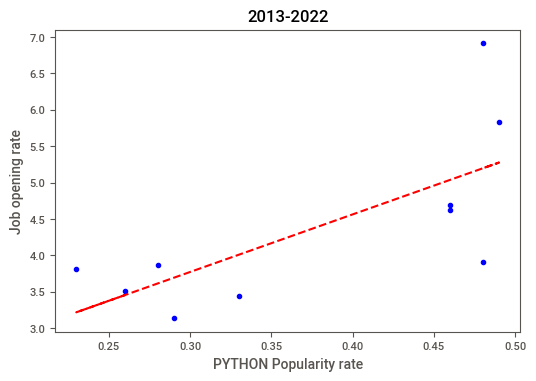

In [55]:
plt.scatter(SOF_PYTHON,BLS_JOBOPENINGS,color='blue')

z = np.polyfit(SOF_PYTHON, BLS_JOBOPENINGS, 1)
p = np.poly1d(z)
plt.plot(SOF_PYTHON,p(SOF_PYTHON),"r--")

plt.title("2013-2022")
plt.xlabel("PYTHON Popularity rate")
plt.ylabel("Job opening rate")
plt.show()

### Cross year relationship
#### Job Opening

#### Python Using - Job Opening

In [56]:
SOF_PYTHON_12=np.array([0.23,0.26,0.23,0.28,0.29,0.33,0.46,0.46,0.48,0.49])

BLS_JOBOPENINGS_13=np.array([3.51,3.81,3.87,3.14,3.44,4.62,4.69,3.91,5.83,6.91])

In [57]:
# calculate spearman's correlation
print('\033[1m' + 'If Python Using popularity has correlation with Job Opening in the last decade:') #Bold
coef, p = spearmanr(SOF_PYTHON_12, BLS_JOBOPENINGS_13)
print('\033[0m' + 'Spearmans correlation coefficient: %.3f' % coef) # change bold back
# interpret the significance
alpha = 0.05

if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)

If Python Using popularity has correlation with Job Opening in the last decade:
Spearmans correlation coefficient: 0.774
Samples are correlated (reject H0) p=0.009


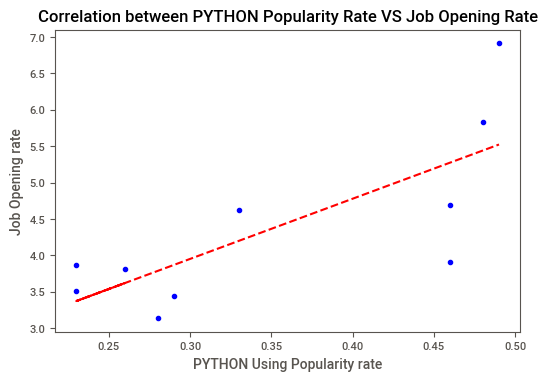

In [61]:
plt.scatter(SOF_PYTHON_12,BLS_JOBOPENINGS_13,color='blue')

z = np.polyfit(SOF_PYTHON_12, BLS_JOBOPENINGS_13, 1)
p = np.poly1d(z)
plt.plot(SOF_PYTHON_12,p(SOF_PYTHON_12),"r--")

plt.title("Correlation between PYTHON Popularity Rate VS Job Opening Rate")
plt.xlabel("PYTHON Using Popularity rate")
plt.ylabel("Job Opening rate")
plt.show()

#### R using - Job Opening

In [63]:
SOF_R_12=np.array([0.01,0.01,0.01,0.04,0,0.04,0.08,0.07,0.07,0.05])
BLS_JOBOPENINGS_13=np.array([3.51,3.81,3.87,3.14,3.44,4.62,4.69,3.91,5.83,6.91])

In [64]:
# calculate spearman's correlation
print('\033[1m' + 'If R Using popularity has correlation with Job Opening in the last decade:') #Bold
coef, p = spearmanr(SOF_R_12, BLS_JOBOPENINGS_13)
print('\033[0m' + 'Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)

If R Using popularity has correlation with Job Opening in the last decade:
Spearmans correlation coefficient: 0.704
Samples are correlated (reject H0) p=0.023


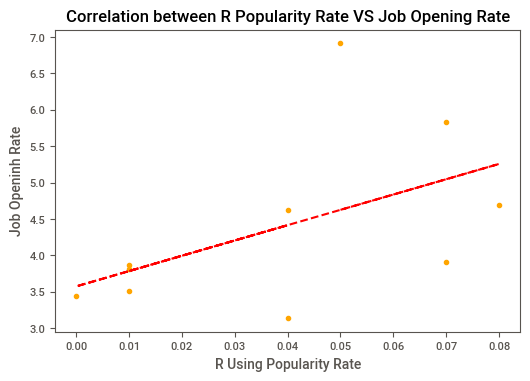

In [65]:
plt.scatter(SOF_R_12,BLS_JOBOPENINGS_13,color='orange')

z = np.polyfit(SOF_R_12, BLS_JOBOPENINGS_13, 1)
p = np.poly1d(z)
plt.plot(SOF_R_12,p(SOF_R_12),"r--")

plt.title("Correlation between R Popularity Rate VS Job Opening Rate")
plt.xlabel("R Using Popularity Rate")
plt.ylabel("Job Openinh Rate")
plt.show()

#### SQL using - Job Opening

In [66]:
SOF_SQL_12=np.array([0.63,0.60,0.51,0.69,0.71,0.56,0.63,0.60,0.62,0.54])
BLS_JOBOPENINGS_13=np.array([3.51,3.81,3.87,3.14,3.44,4.62,4.69,3.91,5.83,6.91])

In [67]:
# calculate spearman's correlation
print('\033[1m' + 'If SQL Using popularity has correlation with Job Opening in the last decade:') #Bold
coef, p = spearmanr(SOF_SQL_12, BLS_JOBOPENINGS_13)
print('\033[0m' + 'Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)

If SQL Using popularity has correlation with Job Opening in the last decade:
Spearmans correlation coefficient: -0.561
Samples are uncorrelated (fail to reject H0) p=0.092


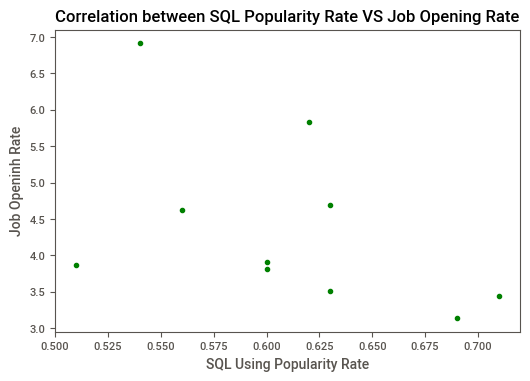

In [95]:
plt.scatter(SOF_SQL_12,BLS_JOBOPENINGS_13,color='green')

##z = np.polyfit(SOF_SQL_12, BLS_JOBOPENINGS_13, 1)
##p = np.poly1d(z)
##plt.plot(SOF_SQL_12,p(SOF_SQL_12),"r--")


plt.title("Correlation between SQL Popularity Rate VS Job Opening Rate")
plt.xlabel("SQL Using Popularity Rate")
plt.ylabel("Job Openinh Rate")
plt.show()

In [69]:
SOF_RUST_17=np.array([0.11,0.16,0.16,0.27,0.27,0.29])
BLS_JOBOPENINGS_16=np.array([3.44,4.62,4.69,3.91,5.83,6.91])

In [70]:
# calculate spearman's correlation
print('\033[1m' + 'If desire of using RUST has correlation with Job Opening in the last decade:') #Bold
coef, p = spearmanr(SOF_SQL_12, BLS_JOBOPENINGS_13)
print('\033[0m' + 'Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)

If desire of using RUST has correlation with Job Opening in the last decade:
Spearmans correlation coefficient: -0.561
Samples are uncorrelated (fail to reject H0) p=0.092


### Hire

#### Python using - Hire rate

In [71]:
SOF_PYTHON_12=np.array([0.23,0.26,0.23,0.28,0.29,0.33,0.46,0.46,0.48,0.49])

BLS_HIRE_13=np.array([2.93,3.06,2.97,2.93,3.00,3.19,3.29,2.95,3.91,3.51])

In [72]:
# calculate spearman's correlation
print('\033[1m' + 'If python Using popularity has correlation with Hire in the last decade:') #Bold
coef, p = spearmanr(SOF_PYTHON_12, BLS_HIRE_13)
print('\033[0m' + 'Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)

If python Using popularity has correlation with Hire in the last decade:
Spearmans correlation coefficient: 0.725
Samples are correlated (reject H0) p=0.018


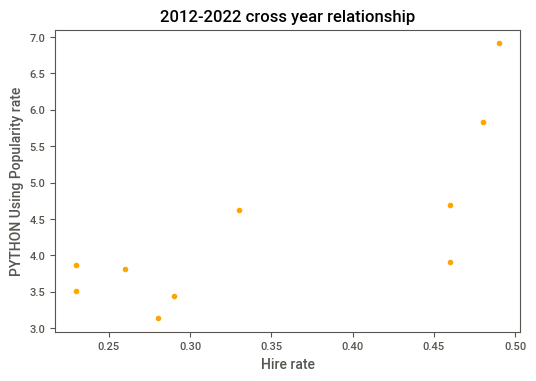

In [73]:
plt.scatter(SOF_PYTHON_12, BLS_JOBOPENINGS_13,color='orange')
plt.title("2012-2022 cross year relationship")
plt.xlabel("Hire rate")
plt.ylabel("PYTHON Using Popularity rate")
plt.show()

#### R using - Hire rate

In [74]:
SOF_R_12=np.array([0.01,0.01,0.01,0.04,0,0.04,0.08,0.07,0.07,0.05])
BLS_HIRE_13=np.array([2.93,3.06,2.97,2.93,3.00,3.19,3.29,2.95,3.91,3.51])

In [75]:
# calculate spearman's correlation
print('\033[1m' + 'If R Using popularity has correlation with Hire in the last decade:') #Bold
coef, p = spearmanr(SOF_R_12, BLS_HIRE_13)
print('\033[0m' +'Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)

If R Using popularity has correlation with Hire in the last decade:
Spearmans correlation coefficient: 0.461
Samples are uncorrelated (fail to reject H0) p=0.180


#### SQL using - Hire rate

In [76]:
SOF_SQL_12=np.array([0.63,0.60,0.51,0.69,0.71,0.56,0.63,0.60,0.62,0.54])
BLS_HIRE_13=np.array([2.93,3.06,2.97,2.93,3.00,3.19,3.29,2.95,3.91,3.51])

In [77]:
# calculate spearman's correlation
print('\033[1m' + 'If SQL Using popularity has correlation with Hire in the last decade:') #Bold
coef, p = spearmanr(SOF_SQL_12, BLS_HIRE_13)
print('\033[0m'+'Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)

If SQL Using popularity has correlation with Hire in the last decade:
Spearmans correlation coefficient: -0.297
Samples are uncorrelated (fail to reject H0) p=0.405


#### Rust desired - Hire rate

In [78]:
SOF_RUST_17=np.array([0.11,0.16,0.16,0.27,0.27,0.29])
BLS_HIRE_16=np.array([3.00,3.19,3.29,2.95,3.91,3.51])

In [79]:
# calculate spearman's correlation
print('\033[1m' + 'If Rust desired popularity has correlation with Hire in the last decade:') #Bold
coef, p = spearmanr(SOF_R_12, BLS_HIRE_13)
print('\033[0m' +'Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)

If Rust desired popularity has correlation with Hire in the last decade:
Spearmans correlation coefficient: 0.461
Samples are uncorrelated (fail to reject H0) p=0.180


## python desired

#### Jobopening - python desired

In [80]:
BLS_opening_12=np.array([3.33,3.51,3.81,3.87,3.14,3.44,4.62,4.69,3.91,5.83])

SOF_desired_PYTHON_13=np.array([0,0,0.31,0.30,0.37,0.46,0.48,0.49,0.43,0.42])

In [81]:
# calculate spearman's correlation
print('\033[1m' + 'If Jobopening has correlation with the desire of using python in the last decade:') #Bold
coef, p = spearmanr(BLS_opening_12, SOF_desired_PYTHON_13)
print('\033[0m' +'Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)

If Jobopening has correlation with the desire of using python in the last decade:
Spearmans correlation coefficient: 0.541
Samples are uncorrelated (fail to reject H0) p=0.106


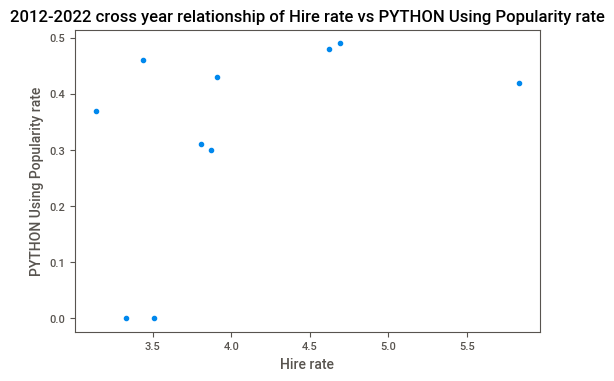

In [82]:
plt.scatter(BLS_opening_12, SOF_desired_PYTHON_13)
plt.title("2012-2022 cross year relationship of Hire rate vs PYTHON Using Popularity rate")
plt.xlabel("Hire rate")
plt.ylabel("PYTHON Using Popularity rate")
plt.show()